# Data Acquisition Notebook

## Original Hypotheses:

1. Which MP's are most guilty of interrupting another MP (giving way)? Are women interrupted more than men?
2. Detecting biased and discriminating language / sentiment of debates in search of party/gender/demographic differences

## Goals:

✅ Connect to API 

☑️ Collect debate data

In [24]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup

import pprintpp
pp = pprintpp.PrettyPrinter(indent=4)

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# 🚫 Collecting the debate content

The API data dpesn't actually seem to include debate contents ... Could we connect to the [Hansard Debates Website](https://hansard.parliament.uk/search/Debates?house=commons&page=1) to scrape & fill in these gaps?

In [3]:
url = "https://hansard.parliament.uk/search/Debates?house=commons&page=1"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
print(response.status_code)

403


Doesn't seem like we'll be able to scrape this website ...

# 💡 Members Data Collection

The developer hub provides other potential data sources of initerest that may act in place of the debate data, and all of those require the members' id values which can be collected from the [Members API](https://members-api.parliament.uk/index.html). I'm therefore starting by collecting the info related to the members:

In [4]:
url = "https://members-api.parliament.uk/api/Members/Search?skip=0&take=20"
response = requests.get(url)
print(response.status_code)

200


✏️ Printing an example response:

In [5]:
pp.pprint(response.json())

{
    'items': [
        {
            'links': [
                {'href': '/Members/172', 'method': 'GET', 'rel': 'self'},
                {'href': '/Members/172', 'method': 'GET', 'rel': 'overview'},
                {
                    'href': '/Members/172/Synopsis',
                    'method': 'GET',
                    'rel': 'synopsis',
                },
                {
                    'href': '/Members/172/Contact',
                    'method': 'GET',
                    'rel': 'contactInformation',
                },
            ],
            'value': {
                'gender': 'F',
                'id': 172,
                'latestHouseMembership': {
                    'house': 1,
                    'membershipEndDate': None,
                    'membershipEndReason': None,
                    'membershipEndReasonId': None,
                    'membershipEndReasonNotes': None,
                    'membershipFrom': 'Hackney North and Stoke Newington',
          

Looking at the output, I believe we might require the folowing values:

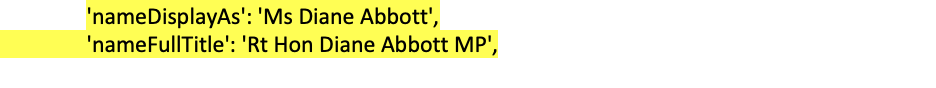
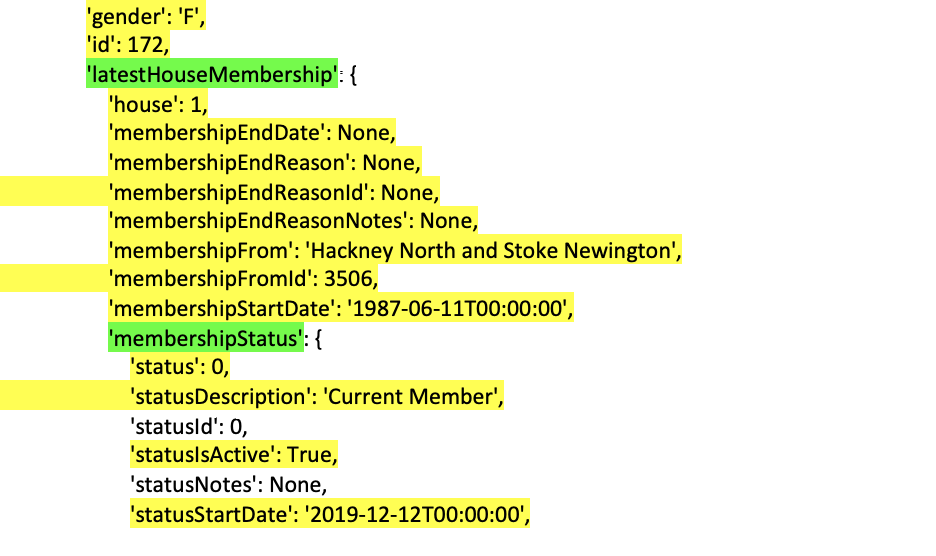
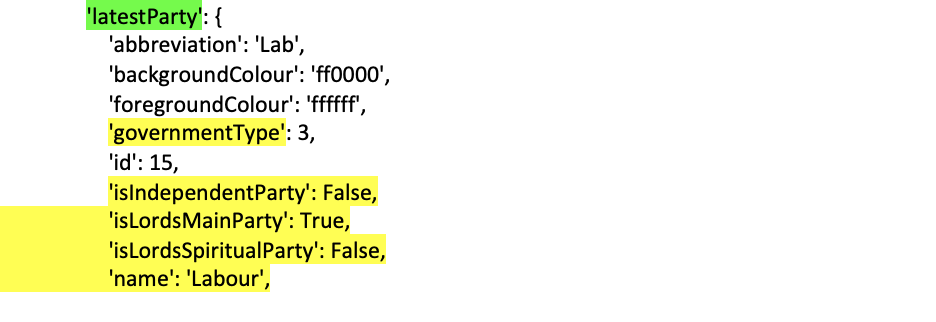

Additionally, I can see that the above link takes the first 20 results out of the total 4763, so the links will need to be adjusted accordingly 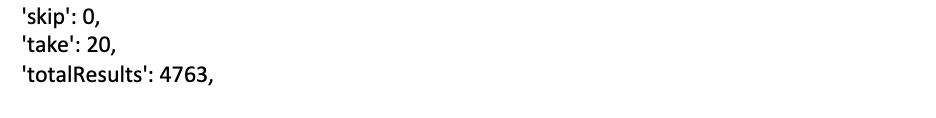

In [8]:
### Testing on 10 results first ...

member_id_list = []
member_displayName_list = [] 
member_fullTitle_list = [] 
member_gender_list = []
member_membershipFrom_list = [] 
member_house_list = [] 
member_membershipStartDate_list = [] 
member_membershipEndDate_list = [] 
member_membershipEndReason_list = [] 
member_membershipEndReasonNotes_list = [] 
members_statusIsActive_list = [] 
members_statusDescription_list = [] 
members_statusNotes_list = [] 
members_statusStartDate_list = [] 
members_partyName_list = [] 
members_partyIsLordsMainParty_list = [] 
members_partyIsLordsSpiritualParty_list = [] 
members_partyIsIndependentParty_list = [] 
members_partyGovernmentType_list = [] 

for i in range(0, 10):
    
    url = "https://members-api.parliament.uk/api/Members/Search?skip=%s&take=1" % i
    response = requests.get(url)
    
    member = response.json()

    try:
        member_id_list.append(member["items"][0]["value"]["id"])
    except:
        member_id_list.append(np.nan)
    
    try:
        member_displayName_list.append(member["items"][0]["value"]["nameDisplayAs"])
    except:
        member_displayName_list.append(np.nan)
        
    try:
        member_fullTitle_list.append(member["items"][0]["value"]["nameFullTitle"])
    except:
        member_fullTitle_list.append(np.nan)
        
    try:
        member_gender_list.append(member["items"][0]["value"]["gender"])
    except:
        member_gender_list.append(np.nan)
    
    try:
        member_membershipFrom_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipFrom"]) 
    except:
        member_membershipFrom_list.append(np.nan)
        
    try:
        member_house_list.append(member["items"][0]["value"]["latestHouseMembership"]["house"])
    except:
        member_house_list.append(np.nan)
        
    try:
        member_membershipStartDate_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipStartDate"]) 
    except:
        member_membershipStartDate_list.append(np.nan) 
        
    try:
        member_membershipEndDate_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipEndDate"]) 
    except:
        member_membershipEndDate_list.append(np.nan) 
        
    try:
        member_membershipEndReason_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipEndReason"])
    except:
        member_membershipEndReason_list.append(np.nan)
        
    try:
        member_membershipEndReasonNotes_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipEndReasonNotes"]) 
    except:
        member_membershipEndReasonNotes_list.append(np.nan)
        
    try:
        members_statusIsActive_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipStatus"]["statusIsActive"]) 
    except:
        members_statusIsActive_list.append(np.nan) 
        
    try:
        members_statusDescription_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipStatus"]["statusDescription"])
    except:
        members_statusDescription_list.append(np.nan)
        
    try:
        members_statusNotes_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipStatus"]["statusNotes"])
    except:
        members_statusNotes_list.append(np.nan)
    
    try:
        members_statusStartDate_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipStatus"]["statusStartDate"]) 
    except:
        members_statusStartDate_list.append(np.nan) 
        
    try:
        members_partyName_list.append(member["items"][0]["value"]["latestParty"]["name"]) 
    except:
        members_partyName_list.append(np.nan) 
        
    try:
        members_partyIsLordsMainParty_list.append(member["items"][0]["value"]["latestParty"]["isLordsMainParty"]) 
    except:
        members_partyIsLordsMainParty_list.append(np.nan) 
        
    try:
        members_partyIsLordsSpiritualParty_list.append(member["items"][0]["value"]["latestParty"]["isLordsSpiritualParty"]) 
    except:
        members_partyIsLordsSpiritualParty_list.append(np.nan) 
        
    try:
        members_partyIsIndependentParty_list.append(member["items"][0]["value"]["latestParty"]["isIndependentParty"]) 
    except:
        members_partyIsIndependentParty_list.append(np.nan) 
        
        
    try:
        members_partyGovernmentType_list.append(member["items"][0]["value"]["latestParty"]["governmentType"])
    except:
        members_partyGovernmentType_list.append(np.nan)
        
members_dictionary = {"id": member_id_list, 
                      "display_name" : member_displayName_list,
                      "full_title" : member_fullTitle_list,
                      "gender" : member_gender_list, 
                      "member_from" : member_membershipFrom_list,
                      "member_house" : member_house_list,
                      "membership_start" : member_membershipStartDate_list,
                      "membership_end" : member_membershipEndDate_list,
                      "membership_end_reason" : member_membershipEndReason_list,
                      "membership_end_reason_notes" : member_membershipEndReasonNotes_list,
                      "status_is_active" : members_statusIsActive_list,
                      "status_description" : members_statusDescription_list,
                      "status_notes" : members_statusNotes_list,
                      "status_start_date" : members_statusStartDate_list,
                      "party" : members_partyName_list,
                      "party_is_lords_main" : members_partyIsLordsMainParty_list,
                      "party_is_lords_spiritual" : members_partyIsLordsSpiritualParty_list,
                      "party_is_independent" : members_partyIsIndependentParty_list,
                      "party_government_type" : members_partyGovernmentType_list}

members_df = pd.DataFrame(data=members_dictionary)
members_df.head(10)

,id,display_name,full_title,gender,member_from,member_house,membership_start,membership_end,membership_end_reason,membership_end_reason_notes,status_is_active,status_description,status_notes,status_start_date,party,party_is_lords_main,party_is_lords_spiritual,party_is_independent,party_government_type
0,172,Ms Diane Abbott,Rt Hon Diane Abbott MP,F,Hackney North and Stoke Newington,1,1987-06-11T00:00:00,None,None,None,True,Current Member,NaN,2019-12-12T00:00:00,Labour,True,False,False,3.0
1,3305,Lord Aberconway,The Lord Aberconway,M,Hereditary,2,1953-05-23T00:00:00,1999-11-11T00:00:00,Excluded,None,NaN,NaN,NaN,NaN,Conservative,True,True,False,0.0
2,3469,The Duke of Abercorn,His Grace the Duke of Abercorn,M,Hereditary,2,1979-06-04T00:00:00,1999-11-11T00:00:00,Excluded,None,NaN,NaN,NaN,NaN,Conservative,True,True,False,0.0
3,3468,Lord Aberdare,The Rt Hon. the Lord Aberdare KBE DL,M,Excepted Hereditary,2,1957-12-18T00:00:00,2005-01-23T00:00:00,Death,None,NaN,NaN,NaN,NaN,Conservative,True,True,False,0.0
4,3898,Lord Aberdare,The Lord Aberdare,M,Excepted Hereditary,2,2009-07-20T00:00:00,None,None,None,True,Current Member,NaN,2009-07-20T00:00:00,Crossbench,True,True,False,NaN
5,3467,Marquess of Aberdeen and Temair,The Most Hon. the Marquess of Aberdeen and Temair,M,Hereditary,2,1984-09-06T00:00:00,1999-11-11T00:00:00,Excluded,None,NaN,NaN,NaN,NaN,Crossbench,True,True,False,NaN
6,3466,Marquess of Abergavenny,The Marquess of Abergavenny KG OBE,M,Hereditary,2,1954-03-30T00:00:00,1999-11-11T00:00:00,Excluded,None,NaN,NaN,NaN,NaN,Crossbench,True,True,False,NaN
7,3465,Lord Abinger,The Lord Abinger,M,Hereditary,2,1943-07-21T00:00:00,1999-11-11T00:00:00,Excluded,None,NaN,NaN,NaN,NaN,Conservative,True,True,False,0.0
8,4212,Debbie Abrahams,Debbie Abrahams MP,F,Oldham East and Saddleworth,1,2011-01-13T00:00:00,None,None,None,True,Current Member,NaN,2019-12-12T00:00:00,Labour,True,False,False,3.0
9,662,Leo Abse,Leo Abse,M,Torfaen,1,1958-11-10T00:00:00,1987-06-11T00:00:00,None,None,NaN,NaN,NaN,NaN,Labour,True,False,False,3.0


In [82]:
### Repeating the above for all results (4763 in total)

member_id_list = []
member_displayName_list = [] 
member_fullTitle_list = [] 
member_gender_list = []
member_membershipFrom_list = [] 
member_house_list = [] 
member_membershipStartDate_list = [] 
member_membershipEndDate_list = [] 
member_membershipEndReason_list = [] 
member_membershipEndReasonNotes_list = [] 
members_statusIsActive_list = [] 
members_statusDescription_list = [] 
members_statusNotes_list = [] 
members_statusStartDate_list = [] 
members_partyName_list = [] 
members_partyIsLordsMainParty_list = [] 
members_partyIsLordsSpiritualParty_list = [] 
members_partyIsIndependentParty_list = [] 
members_partyGovernmentType_list = [] 

from alive_progress import alive_bar

with alive_bar(len(range(0, 4763)), force_tty=True) as bar:
    for i in range(0, 4763):
        
        url = "https://members-api.parliament.uk/api/Members/Search?skip=%s&take=1" % i
        response = requests.get(url)
        
        member = response.json()

        try:
            member_id_list.append(member["items"][0]["value"]["id"])
        except:
            member_id_list.append(np.nan)
        
        try:
            member_displayName_list.append(member["items"][0]["value"]["nameDisplayAs"])
        except:
            member_displayName_list.append(np.nan)
            
        try:
            member_fullTitle_list.append(member["items"][0]["value"]["nameFullTitle"])
        except:
            member_fullTitle_list.append(np.nan)
            
        try:
            member_gender_list.append(member["items"][0]["value"]["gender"])
        except:
            member_gender_list.append(np.nan)
        
        try:
            member_membershipFrom_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipFrom"]) 
        except:
            member_membershipFrom_list.append(np.nan)
            
        try:
            member_house_list.append(member["items"][0]["value"]["latestHouseMembership"]["house"])
        except:
            member_house_list.append(np.nan)
            
        try:
            member_membershipStartDate_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipStartDate"]) 
        except:
            member_membershipStartDate_list.append(np.nan) 
            
        try:
            member_membershipEndDate_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipEndDate"]) 
        except:
            member_membershipEndDate_list.append(np.nan) 
            
        try:
            member_membershipEndReason_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipEndReason"])
        except:
            member_membershipEndReason_list.append(np.nan)
            
        try:
            member_membershipEndReasonNotes_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipEndReasonNotes"]) 
        except:
            member_membershipEndReasonNotes_list.append(np.nan)
            
        try:
            members_statusIsActive_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipStatus"]["statusIsActive"]) 
        except:
            members_statusIsActive_list.append(np.nan) 
            
        try:
            members_statusDescription_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipStatus"]["statusDescription"])
        except:
            members_statusDescription_list.append(np.nan)
            
        try:
            members_statusNotes_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipStatus"]["statusNotes"])
        except:
            members_statusNotes_list.append(np.nan)
        
        try:
            members_statusStartDate_list.append(member["items"][0]["value"]["latestHouseMembership"]["membershipStatus"]["statusStartDate"]) 
        except:
            members_statusStartDate_list.append(np.nan) 
            
        try:
            members_partyName_list.append(member["items"][0]["value"]["latestParty"]["name"]) 
        except:
            members_partyName_list.append(np.nan) 
            
        try:
            members_partyIsLordsMainParty_list.append(member["items"][0]["value"]["latestParty"]["isLordsMainParty"]) 
        except:
            members_partyIsLordsMainParty_list.append(np.nan) 
            
        try:
            members_partyIsLordsSpiritualParty_list.append(member["items"][0]["value"]["latestParty"]["isLordsSpiritualParty"]) 
        except:
            members_partyIsLordsSpiritualParty_list.append(np.nan) 
            
        try:
            members_partyIsIndependentParty_list.append(member["items"][0]["value"]["latestParty"]["isIndependentParty"]) 
        except:
            members_partyIsIndependentParty_list.append(np.nan) 
            
            
        try:
            members_partyGovernmentType_list.append(member["items"][0]["value"]["latestParty"]["governmentType"])
        except:
            members_partyGovernmentType_list.append(np.nan)
            
        bar()
        
members_dictionary = {"id": member_id_list, 
                      "display_name" : member_displayName_list,
                      "full_title" : member_fullTitle_list,
                      "gender" : member_gender_list, 
                      "member_from" : member_membershipFrom_list,
                      "member_house" : member_house_list,
                      "membership_start" : member_membershipStartDate_list,
                      "membership_end" : member_membershipEndDate_list,
                      "membership_end_reason" : member_membershipEndReason_list,
                      "membership_end_reason_notes" : member_membershipEndReasonNotes_list,
                      "status_is_active" : members_statusIsActive_list,
                      "status_description" : members_statusDescription_list,
                      "status_notes" : members_statusNotes_list,
                      "status_start_date" : members_statusStartDate_list,
                      "party" : members_partyName_list,
                      "party_is_lords_main" : members_partyIsLordsMainParty_list,
                      "party_is_lords_spiritual" : members_partyIsLordsSpiritualParty_list,
                      "party_is_independent" : members_partyIsIndependentParty_list,
                      "party_government_type" : members_partyGovernmentType_list}

members_df = pd.DataFrame(data=members_dictionary)
members_df.head()


|████████████████████████████████████████| 4763/4763 [100%] in 25:20.5 (3.13/s) 


,id,display_name,full_title,gender,member_from,member_house,membership_start,membership_end,membership_end_reason,membership_end_reason_notes,status_is_active,status_description,status_notes,status_start_date,party,party_is_lords_main,party_is_lords_spiritual,party_is_independent,party_government_type
0,172,Ms Diane Abbott,Rt Hon Diane Abbott MP,F,Hackney North and Stoke Newington,1,1987-06-11T00:00:00,None,None,None,True,Current Member,None,2019-12-12T00:00:00,Labour,True,False,False,3.0
1,3305,Lord Aberconway,The Lord Aberconway,M,Hereditary,2,1953-05-23T00:00:00,1999-11-11T00:00:00,Excluded,None,NaN,NaN,NaN,NaN,Conservative,True,True,False,0.0
2,3469,The Duke of Abercorn,His Grace the Duke of Abercorn,M,Hereditary,2,1979-06-04T00:00:00,1999-11-11T00:00:00,Excluded,None,NaN,NaN,NaN,NaN,Conservative,True,True,False,0.0
3,3468,Lord Aberdare,The Rt Hon. the Lord Aberdare KBE DL,M,Excepted Hereditary,2,1957-12-18T00:00:00,2005-01-23T00:00:00,Death,None,NaN,NaN,NaN,NaN,Conservative,True,True,False,0.0
4,3898,Lord Aberdare,The Lord Aberdare,M,Excepted Hereditary,2,2009-07-20T00:00:00,None,None,None,True,Current Member,None,2009-07-20T00:00:00,Crossbench,True,True,False,NaN


Saving the dataframe:

In [ ]:
members_df.to_pickle("members.pkl")

# Exploring what other data can be collected from the developer hub

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup

import pprintpp
pp = pprintpp.PrettyPrinter(indent=4)

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 📍 Commons Votes API
- Returns historical data on how a member voted on a given Commons Bill

In [15]:
url = "https://commonsvotes-api.parliament.uk/data/divisions.json/membervoting?queryParameters.memberId=172"
response = requests.get(url)
# pp.pprint(response.json())

## House of Commons Oral and Written Questions 
- Returns a list of questions asked from a given party member
- Doesn't actually contain their answers, so will not be particularly useful for NLP purposes

In [14]:
url = "https://oralquestionsandmotions-api.parliament.uk/oralquestions/list"
response = requests.get(url)
# pp.pprint(response.json())

## Bills
- Returns a list of bills being discussed in the house of Commons
- Doesn't reflect the stances of the members so also of little interest

In [13]:
url = "https://bills-api.parliament.uk/api/v1/Bills?CurrentHouse=Commons&OriginatingHouse=All"
response = requests.get(url)
# pp.pprint(response.json())

## Written Questions
- Returns a list of written questions asked to the gov-t
- Again, no answers so no needed insights

In [12]:
url = "https://writtenquestions-api.parliament.uk/api/writtenquestions/questions?answered=Any&questionStatus=AllQuestions&includeWithdrawn=true&expandMember=true"
response = requests.get(url)
# pp.pprint(response.json())

## 📍 Written Statements
- Returns a list of statements made by the gov-t, can be filtered by member id
- This may be potentially useful for NLP purposes

In [ ]:
url = "https://writtenquestions-api.parliament.uk/api/writtenstatements/statements?house=Commons"
response = requests.get(url)
# pp.pprint(response.json())

# Developer Hub API Summary & Discussion

* **CommonsVotes API**  - returns historical data on how a member voted on a given Commons Bill
* **Lords Votes API** - same but for Lords
* **House of Commons Oral and Written Questions**  - Returns a list of questions asked from a given party member (with no answers?)
* **Bills** - Returns a list of bills being discussed in the house of Commons
* **Written Questions** - Returns a list of written questions asked to the gov-t; can be answered by several members
* **Written Statements** - Returns a list of statements made by the gov-t, can be filtered by member id


Of the above, the closest data we can get to somewhat address our hypotheses are the **written statements**, as they offer textual insights into the sentiments of the members. As they are written statements, it is unlikely there will be biased/discriminating language present, nor, of course, the interruption aspect; but if we are to use the API, we could develop other interesting hypotheses and uncover novel insights from the data available. Additionally, it may be of interest to collect the **voting data** of a given individual & collate it with the other information. *As a possible alt. hypothesis - could we predict the outcome of a given vote using historical data on the members' written statements, past voting and demgraphics?*

# 💡 Written Statement Data Collection

In [20]:
url = "https://writtenquestions-api.parliament.uk/api/writtenstatements/statements?house=Commons"
response = requests.get(url)
pp.pprint(response.json())

{
    'results': [
        {
            'links': [
                {
                    'href': '/Statements/5457583',
                    'method': 'GET',
                    'rel': 'self',
                },
            ],
            'value': {
                'answeringBodyId': 215,
                'answeringBodyName': 'Department for Energy Security and Net Zero',
                'attachments': [],
                'dateMade': '2023-03-30T00:00:00',
                'hasAttachments': False,
                'hasLinkedStatements': False,
                'house': 'Commons',
                'id': 1608928,
                'linkedStatements': None,
                'member': None,
                'memberId': 1482,
                'memberRole': 'Minister of State (Minister for Energy Security and Net Zero)',
                'noticeNumber': 9,
                'text': 'Cheap, abundant and reliable energy is a foundation stone of a thriving economy. We rely on it to power our homes, our infr

- There are 6255 results in total
- As above, 20 results are output at once
- The structure of the data remains as follows:
            
            'value': {
                'answeringBodyId': 217,
                'answeringBodyName': 'Department for Culture, Media and Sport',
                'attachments': [],
                'dateMade': '2023-03-29T00:00:00',
                'hasAttachments': False,
                'hasLinkedStatements': True,
                'house': 'Commons',
                'id': 1608470,
                'linkedStatements': [],
                'member': None,
                'memberId': 4517,
                'memberRole': 'Secretary of State for Culture, Media and Sport',
                'noticeNumber': 2,
                'text': 'Today the Government is publishing a draft Media Bill. This will ensure we can deliver on key aspects of the Government’s vision for the broadcasting sector, set out last year in our landmark white paper, Up Next. The Media Bill will reform decades-old la...',
                'title': 'Media Update',
                'uin': 'HCWS685',}

## Gathering the full written statements data

In [35]:
statement_id_list = []
title_list = []
text_list = []
member_id_list = []
member_list = []
member_role_list = []
date_made_list = []
answeringBodyId_list = []
answeringBodyName_list = []
house_list = []

from alive_progress import alive_bar

with alive_bar(len(range(0, 6255)), force_tty=True) as bar:
    
    for i in range(0, 6255):
        
        url = "https://writtenquestions-api.parliament.uk/api/writtenstatements/statements?house=Commons&skip=%s&take=1" % i
        response = requests.get(url)
        statement = response.json()
        
        try:
            statement_id_list.append(statement["results"][0]["value"]["id"])
        except:
            statement_id_list.append(np.nan)
            
        try: 
            title_list.append(statement["results"][0]["value"]["title"])
        except: 
            title_list.append(np.nan)
            
        try: 
            text_list.append(statement["results"][0]["value"]["text"])
        except: 
            text_list.append(np.nan)
            
        try: 
            member_id_list.append(statement["results"][0]["value"]["memberId"])
        except: 
            member_id_list.append(np.nan)
        
        try: 
            member_list.append(statement["results"][0]["value"]["member"])
        except: 
            member_list.append(np.nan)
            
        try: 
            member_role_list.append(statement["results"][0]["value"]["memberRole"])
        except: 
            member_role_list.append(np.nan)

        try: 
            date_made_list.append(statement["results"][0]["value"]["dateMade"])
        except: 
            date_made_list.append(np.nan)               
            
        try: 
            answeringBodyId_list.append(statement["results"][0]["value"]["answeringBodyId"])
        except: 
            answeringBodyId_list.append(np.nan)
            
        try: 
            answeringBodyName_list.append(statement["results"][0]["value"]["answeringBodyName"])
        except: 
            answeringBodyName_list.append(np.nan)
            
        try: 
            house_list.append(statement["results"][0]["value"]["house"])
        except: 
            house_list.append(np.nan)
              
        bar()

|████████████████████████████████████████| 6255/6255 [100%] in 1:23:39.2 (1.25/s


In [36]:
statements_dictionary = {"statement_id" : statement_id_list,
                         "statement_title" : title_list,
                         "statement_text" : text_list,
                         "member_id" : member_id_list,
                         "member_name" : member_list,
                         "member_role" : member_role_list,
                         "statement_date" : date_made_list,
                         "answering_body_id" : answeringBodyId_list, 
                         "answering_body_name" : answeringBodyName_list,
                         "house" : house_list}

written_statements_df = pd.DataFrame(data=statements_dictionary)
written_statements_df.head()

,statement_id,statement_title,statement_text,member_id,member_name,member_role,statement_date,answering_body_id,answering_body_name,house
0,1608928,Powering Up Britain,"Cheap, abundant and reliable energy is a found...",1482,None,Minister of State (Minister for Energy Securit...,2023-03-30T00:00:00,215,215,Commons
1,1608485,Supporting people nearing the end of their lives,The Government is committed to providing suppo...,4369,None,"Minister of State for Disabled People, Health ...",2023-03-29T00:00:00,29,29,Commons
2,1608484,Hong Kong veterans’ settlement route,"I am pleased to announce that, from Autumn thi...",4320,None,The Minister of State for Immigration,2023-03-29T00:00:00,1,1,Commons
3,1608473,UK and Singapore Investment Treaty Negotiation,The Government will shortly commence negotiati...,4597,None,Secretary of State for Department for Business...,2023-03-29T00:00:00,214,214,Commons
4,1608472,Artificial Intelligence Regulation White Paper,I am pleased and excited to announce that toda...,4530,None,"Secretary of State for Science, Innovation and...",2023-03-29T00:00:00,216,216,Commons


In [38]:
written_statements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   statement_id         6255 non-null   int64 
 1   statement_title      6255 non-null   object
 2   statement_text       6255 non-null   object
 3   member_id            6255 non-null   int64 
 4   member_name          0 non-null      object
 5   member_role          6255 non-null   object
 6   statement_date       6255 non-null   object
 7   answering_body_id    6255 non-null   int64 
 8   answering_body_name  6255 non-null   int64 
 9   house                6255 non-null   object
dtypes: int64(4), object(6)
memory usage: 488.8+ KB


Saving the written statements data to a pickle file:

In [37]:
written_statements_df.to_pickle("written_statements.pkl")

# Commons Votes Data Collection

In [53]:
url = "https://commonsvotes-api.parliament.uk/data/divisions.json/membervoting?queryParameters.memberId=172&queryParameters.skip=0&queryParameters.take=1"
response = requests.get(url)
pp.pprint(response.json())

[
    {
        'MemberId': 172,
        'MemberVotedAye': True,
        'MemberWasTeller': False,
        'PublishedDivision': {
            'AyeCount': 211,
            'AyeTellers': [
                {
                    'ListAs': 'Twist, Liz',
                    'MemberFrom': 'Blaydon',
                    'MemberId': 4618,
                    'Name': 'Liz Twist',
                    'Party': 'Labour',
                    'PartyAbbreviation': 'Lab',
                    'PartyColour': 'ff0000',
                    'ProxyName': None,
                    'SubParty': None,
                },
                {
                    'ListAs': 'Fletcher, Colleen',
                    'MemberFrom': 'Coventry North East',
                    'MemberId': 4378,
                    'Name': 'Colleen Fletcher',
                    'Party': 'Labour',
                    'PartyAbbreviation': 'Lab',
                    'PartyColour': 'ff0000',
                    'ProxyName': None,
                

Within the voting data, I think we care for the following variables:

* 'MemberId' 
* 'Title'
* 'MemberVotedAye' 
* 'MemberWasTeller' 
* 'AyeCount' 
* 'NoCount' 
* 'Date'

As above, this request only produces 25 results at the time. 
An additional API is required to retrieve the total number of bills a given member voted on & we can use the resulting value to retreive all results for a given member.

## Using the Total Results API to assist the necessary Bills data collection:

In [2]:
members = pd.read_pickle("members.pkl")

In [4]:
## Getting the total vote counts for the available members 

members_with_votes_count = {}

for member_id in members.id.unique():
    
    url = "https://commonsvotes-api.parliament.uk/data/divisions.json/searchTotalResults?queryParameters.memberId=%s" % member_id
    vote_count = requests.get(url).json()

    if vote_count != 0:
        members_with_votes_count[member_id] = vote_count

In [7]:
print("There are ", len(members_with_votes_count), " members with voting data.")
print(members_with_votes_count)

There are  901  members with voting data.
{172: 1024, 4212: 1020, 4057: 1216, 4639: 1109, 1586: 1315, 4841: 312, 4427: 157, 4741: 626, 4069: 1370, 4038: 298, 4138: 1124, 4747: 588, 4411: 1235, 364: 97, 4516: 592, 4573: 917, 4667: 991, 44: 893, 1486: 133, 4788: 608, 4743: 689, 4742: 604, 4508: 513, 4032: 1259, 4512: 855, 4623: 970, 4362: 1390, 4387: 142, 4244: 1098, 4855: 619, 4399: 1324, 1511: 419, 4798: 709, 1451: 1220, 4597: 1033, 320: 522, 4757: 674, 4847: 681, 4784: 691, 4064: 1274, 4107: 1250, 4095: 1096, 4486: 850, 4828: 600, 1390: 1096, 392: 501, 3955: 214, 4800: 671, 3910: 605, 328: 1002, 4790: 548, 4837: 705, 1441: 638, 413: 1170, 4793: 649, 1547: 572, 103: 1293, 4036: 410, 4060: 1168, 4489: 213, 394: 1134, 4818: 678, 3994: 222, 4421: 839, 4390: 945, 4005: 1353, 4357: 979, 1501: 465, 4019: 169, 4864: 575, 4037: 178, 4058: 1126, 104: 1230, 3995: 508, 1581: 1225, 4748: 469, 4502: 210, 4388: 176, 117: 1121, 4601: 1067, 4588: 690, 4663: 1035, 4110: 1094, 230: 1143, 435: 1120, 151:

In [35]:
import csv

with open("member_vote_counts.csv", "w", newline="") as fp:

    writer = csv.DictWriter(fp, fieldnames=members_with_votes_count.keys())
    writer.writeheader()
    writer.writerow(members_with_votes_count)

## Collecting the full voting data for all members:

In [10]:
def get_voting_data(dictionary, save_file_title):
    
    all_member_votes = pd.DataFrame(columns=["member_id", 
                                        "vote_title", 
                                        "vote_date", 
                                        "aye_count", 
                                        "no_count", 
                                        "member_voted_aye", 
                                        "member_was_teller"])
    
    from alive_progress import alive_bar

    for key, value in dictionary.items():
        
            print("Processing member ", list(dictionary).index(key), " of ", len(dictionary.items()))
            
            member_id_list = []
            vote_title_list = []
            vote_date_list = []
            aye_count_list = []
            no_count_list = []
            member_voted_aye_list = []
            member_was_teller_list = []
            
            with alive_bar(len(range(0, value)), force_tty=True) as bar:
            
                for bill in range(0, value):
                    
                    url = "https://commonsvotes-api.parliament.uk/data/divisions.json/membervoting?queryParameters.memberId=%s&queryParameters.skip=%s&queryParameters.take=1" % (key, bill)
                    response = requests.get(url)
                    
                    if response.status_code == 200:
                            
                        member_vote_info = response.json()
                        
                        try:
                            member_id_list.append(member_vote_info[0]["MemberId"])
                        except:
                            member_id_list.append(np.nan)
                        
                        try: 
                            vote_title_list.append(member_vote_info[0]["PublishedDivision"]["Title"])   
                        except:
                            vote_title_list.append(np.nan) 
                            
                        try:
                            vote_date_list.append(member_vote_info[0]["PublishedDivision"]["Date"])    
                        except:
                            vote_date_list.append(np.nan)
                            
                        try:
                            aye_count_list.append(member_vote_info[0]["PublishedDivision"]["AyeCount"])
                        except:
                            aye_count_list.append(np.nan)
                            
                        try:
                            no_count_list.append(member_vote_info[0]["PublishedDivision"]["NoCount"])        
                        except:
                            no_count_list.append(np.nan)
                            
                        try:
                            member_voted_aye_list.append(member_vote_info[0]["MemberVotedAye"])        
                        except:
                            member_voted_aye_list.append(np.nan)
                            
                        try:
                            member_was_teller_list.append(member_vote_info[0]["MemberWasTeller"])        
                        except:
                            member_was_teller_list.append(np.nan)
                            
                        bar()
                        
                    else: 
                        print("Response error. Restart the loop from member ", list(dictionary).index(key)) 
                        break
                
            member_votes_dictionary = {"member_id" : member_id_list,
                                        "vote_title" : vote_title_list,
                                        "vote_date" : vote_date_list,
                                        "aye_count" : aye_count_list,
                                        "no_count" : no_count_list,
                                        "member_voted_aye" : member_voted_aye_list,
                                        "member_was_teller" : member_was_teller_list}

            member_votes_df = pd.DataFrame(data=member_votes_dictionary)
            
            # Concatenating a single member's voting history with the rest of the members...       
            all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)
            all_member_votes.to_pickle(save_file_title)
            
            del member_votes_df
            
    return all_member_votes    

In [32]:
all_member_votes_0 = get_voting_data(dictionary=members_with_votes_count, save_file_title = 'votes_0.pkl')

Processing member  0  of 901
|████████████████████████████████████████| 1024/1024 [100%] in 4:49.7 (3.53/s)  
Processing member  1  of 901
|████████████████████████████████████████| 1020/1020 [100%] in 4:15.7 (3.99/s)  
Processing member  2  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1216/1216 [100%] in 5:11.2 (3.91/s)  
Processing member  3  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1109/1109 [100%] in 4:55.6 (3.75/s)   ▇▅▃ 166/1109 [15%] in 25s (~2:20, 6.8 ▅▇▇ 435/1109 [39%] in 1:08 (~1:45, 6.
Processing member  4  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1315/1315 [100%] in 5:48.4 (3.77/s)  
Processing member  5  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 312/312 [100%] in 2:09.2 (2.40/s)    
Processing member  6  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 157/157 [100%] in 32.7s (4.79/s)     
Processing member  7  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 626/626 [100%] in 2:11.8 (4.75/s)    
Processing member  8  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1370/1370 [100%] in 5:48.1 (3.93/s)  
Processing member  9  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 298/298 [100%] in 47.1s (6.33/s)      ▂▂▄ 261/298 [88%] in 41s (~6s, 6.3/s)
Processing member  10  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1124/1124 [100%] in 4:34.0 (4.10/s)   ▆▄▂ 135/1124 [12%] in 21s (~2:29, 6.6
Processing member  11  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 588/588 [100%] in 1:52.7 (5.22/s)    
Processing member  12  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1235/1235 [100%] in 4:51.1 (4.24/s)  
Processing member  13  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 97/97 [100%] in 15.2s (6.37/s)       
Processing member  14  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 592/592 [100%] in 2:01.2 (4.88/s)    
Processing member  15  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 917/917 [100%] in 3:45.3 (4.07/s)    
Processing member  16  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 991/991 [100%] in 4:19.2 (3.82/s)    
Processing member  17  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 893/893 [100%] in 3:47.1 (3.93/s)    
Processing member  18  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 133/133 [100%] in 21.1s (6.30/s)     
Processing member  19  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 608/608 [100%] in 1:58.7 (5.13/s)    
Processing member  20  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 689/689 [100%] in 2:19.2 (4.95/s)    
Processing member  21  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 604/604 [100%] in 1:53.2 (5.34/s)    
Processing member  22  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 513/513 [100%] in 1:34.7 (5.42/s)    
Processing member  23  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1259/1259 [100%] in 6:02.9 (3.47/s)  
Processing member  24  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 855/855 [100%] in 3:16.5 (4.35/s)    
Processing member  25  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 970/970 [100%] in 3:56.4 (4.10/s)    
Processing member  26  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1390/1390 [100%] in 6:18.7 (3.67/s)  
Processing member  27  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 142/142 [100%] in 37.2s (3.82/s)     
Processing member  28  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1098/1098 [100%] in 4:48.1 (3.81/s)  
Processing member  29  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 619/619 [100%] in 2:14.3 (4.61/s)    
Processing member  30  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1324/1324 [100%] in 6:29.0 (3.40/s)  
Processing member  31  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 419/419 [100%] in 1:24.7 (4.94/s)    
Processing member  32  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 709/709 [100%] in 2:57.4 (4.00/s)    
Processing member  33  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1220/1220 [100%] in 5:51.0 (3.47/s)  


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  34  of 901
|████████████████████████████████████████| 1033/1033 [100%] in 4:55.2 (3.50/s)  
Processing member  35  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 522/522 [100%] in 1:53.6 (4.60/s)    
Processing member  36  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 674/674 [100%] in 2:39.3 (4.23/s)    
Processing member  37  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 681/681 [100%] in 2:39.0 (4.28/s)    
Processing member  38  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 691/691 [100%] in 2:49.5 (4.08/s)    
Processing member  39  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1274/1274 [100%] in 6:32.8 (3.24/s)  
Processing member  40  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1250/1250 [100%] in 7:12.4 (2.89/s)  
Processing member  41  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1096/1096 [100%] in 7:50.1 (2.33/s)  
Processing member  42  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 850/850 [100%] in 3:45.5 (3.77/s)    
Processing member  43  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 600/600 [100%] in 2:18.6 (4.33/s)    
Processing member  44  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1096/1096 [100%] in 4:54.5 (3.72/s)  
Processing member  45  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 501/501 [100%] in 1:54.1 (4.39/s)    
Processing member  46  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 214/214 [100%] in 46.0s (4.64/s)     
Processing member  47  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 671/671 [100%] in 2:42.1 (4.14/s)    
Processing member  48  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 605/605 [100%] in 2:08.5 (4.71/s)    
Processing member  49  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1002/1002 [100%] in 4:48.1 (3.48/s)  
Processing member  50  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 548/548 [100%] in 1:56.0 (4.72/s)    
Processing member  51  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 705/705 [100%] in 2:34.5 (4.56/s)    
Processing member  52  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 638/638 [100%] in 2:21.7 (4.50/s)    
Processing member  53  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1170/1170 [100%] in 5:11.1 (3.76/s)  
Processing member  54  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 649/649 [100%] in 2:08.7 (5.04/s)    
Processing member  55  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 572/572 [100%] in 1:52.4 (5.09/s)    
Processing member  56  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1293/1293 [100%] in 5:40.9 (3.79/s)  
Processing member  57  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 410/410 [100%] in 1:16.9 (5.33/s)    
Processing member  58  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1168/1168 [100%] in 5:17.1 (3.68/s)  
Processing member  59  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 213/213 [100%] in 52.0s (4.09/s)     
Processing member  60  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1134/1134 [100%] in 5:46.5 (3.27/s)  
Processing member  61  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 678/678 [100%] in 2:47.8 (4.04/s)    
Processing member  62  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 222/222 [100%] in 40.8s (5.44/s)     
Processing member  63  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 839/839 [100%] in 3:19.0 (4.22/s)    
Processing member  64  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 945/945 [100%] in 4:00.3 (3.93/s)    
Processing member  65  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1353/1353 [100%] in 6:21.0 (3.55/s)  
Processing member  66  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 979/979 [100%] in 4:22.5 (3.73/s)    
Processing member  67  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 465/465 [100%] in 1:34.2 (4.94/s)    
Processing member  68  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 169/169 [100%] in 33.8s (5.00/s)     
Processing member  69  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 575/575 [100%] in 2:00.1 (4.79/s)    
Processing member  70  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 178/178 [100%] in 33.6s (5.29/s)     
Processing member  71  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1126/1126 [100%] in 5:20.9 (3.51/s)  
Processing member  72  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1230/1230 [100%] in 5:46.0 (3.55/s)  
Processing member  73  of 901


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_67978/725668724.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|███████████████████████████████████▊⚠︎   | (!) 454/508 [89%] in 2:30.2 (3.03/s) 


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

### Re-starting the data collection each time the connection aborts:

In [8]:
### Re-importing the dictionary

import csv

reader = csv.DictReader(open('member_vote_counts.csv'))
member_votes_count = next(reader) 
member_votes_count = {int(k):int(v) for k, v in member_votes_count.items()}

In [11]:
### Slicing into the dictionary

import itertools

member_votes_count_1 = dict(itertools.islice(member_votes_count.items(), 73 , len(member_votes_count)))
print(member_votes_count_1)

{3995: 508, 1581: 1225, 4748: 469, 4502: 210, 4388: 176, 117: 1121, 4601: 1067, 4588: 690, 4663: 1035, 4110: 1094, 230: 1143, 435: 1120, 151: 476, 4475: 1212, 77: 227, 1400: 1095, 4643: 1120, 4133: 1282, 4067: 1239, 4792: 691, 4838: 653, 4417: 991, 1530: 879, 4470: 986, 1583: 1094, 523: 1157, 4801: 698, 3958: 1321, 1446: 1099, 4821: 691, 199: 1092, 4106: 1250, 301: 490, 4613: 1123, 4493: 1180, 1427: 110, 3922: 1158, 46: 220, 1518: 208, 1201: 602, 1489: 926, 4745: 697, 4831: 591, 1171: 990, 207: 331, 4389: 1115, 4086: 1218, 4770: 352, 1467: 16, 4412: 976, 529: 1183, 1409: 915, 514: 410, 4651: 931, 1442: 1069, 4104: 209, 1527: 59, 4791: 707, 4519: 1376, 288: 1283, 4865: 657, 4492: 1307, 4481: 1322, 4765: 576, 4267: 1083, 4402: 896, 3972: 493, 4610: 870, 4419: 972, 3987: 1240, 242: 898, 4380: 1283, 4650: 420, 4822: 476, 1578: 1234, 4655: 1082, 4819: 612, 366: 521, 4756: 717, 4835: 709, 1563: 99, 4366: 1169, 249: 1277, 553: 434, 360: 527, 458: 438, 4098: 1293, 4775: 680, 3986: 1293, 4022: 

In [12]:
all_member_votes_1 = get_voting_data(dictionary=member_votes_count_1, 
                                     save_file_title = 'votes_1.pkl')

Processing member  0  of  828
|████████████████████████████████████████| 508/508 [100%] in 1:59.1 (4.27/s)    
Processing member  1  of  828
|████████████████████████████████████████| 1225/1225 [100%] in 5:45.9 (3.54/s)  
Processing member  2  of  828


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 469/469 [100%] in 1:41.0 (4.65/s)    
Processing member  3  of  828


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 210/210 [100%] in 45.1s (4.64/s)     
Processing member  4  of  828


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 176/176 [100%] in 41.3s (4.24/s)     
Processing member  5  of  828


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1121/1121 [100%] in 5:19.2 (3.51/s)  
Processing member  6  of  828


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1067/1067 [100%] in 4:43.9 (3.76/s)  
Processing member  7  of  828


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 690/690 [100%] in 3:34.6 (3.21/s)    
Processing member  8  of  828


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1035/1035 [100%] in 4:55.7 (3.50/s)  
Processing member  9  of  828


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1094/1094 [100%] in 4:52.2 (3.74/s)  
Processing member  10  of  828


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████▉⚠︎                          | (!) 368/1143 [32%] in 1:14.9 (4.91/s)


SSLError: HTTPSConnectionPool(host='commonsvotes-api.parliament.uk', port=443): Max retries exceeded with url: /data/divisions.json/membervoting?queryParameters.memberId=230&queryParameters.skip=368&queryParameters.take=1 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:992)')))

In [13]:
member_votes_count_2 = dict(itertools.islice(member_votes_count_1.items(),  10, len(member_votes_count_1)))

all_member_votes_2 = get_voting_data(dictionary=member_votes_count_2, 
                                     save_file_title = 'votes_2.pkl')

Processing member  0  of  818
|████████████████████████████████████████| 1143/1143 [100%] in 9:00.3 (2.11/s)  
Processing member  1  of  818
|████████████████████████████████████████| 1120/1120 [100%] in 7:27.9 (2.50/s)  
Processing member  2  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 476/476 [100%] in 1:47.6 (4.43/s)    
Processing member  3  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1212/1212 [100%] in 5:20.0 (3.79/s)  
Processing member  4  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 227/227 [100%] in 49.3s (4.60/s)     
Processing member  5  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1095/1095 [100%] in 5:25.6 (3.36/s)  
Processing member  6  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1120/1120 [100%] in 5:25.3 (3.44/s)  
Processing member  7  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1282/1282 [100%] in 6:00.5 (3.56/s)  
Processing member  8  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1239/1239 [100%] in 5:46.0 (3.58/s)  
Processing member  9  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 691/691 [100%] in 2:42.6 (4.25/s)    
Processing member  10  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 653/653 [100%] in 2:45.0 (3.96/s)    
Processing member  11  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 991/991 [100%] in 4:22.1 (3.78/s)    
Processing member  12  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 879/879 [100%] in 3:52.8 (3.78/s)    
Processing member  13  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 986/986 [100%] in 4:44.6 (3.46/s)    
Processing member  14  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1094/1094 [100%] in 5:12.1 (3.51/s)  
Processing member  15  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1157/1157 [100%] in 5:28.6 (3.52/s)  
Processing member  16  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 698/698 [100%] in 2:48.3 (4.15/s)    
Processing member  17  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1321/1321 [100%] in 6:29.4 (3.39/s)  
Processing member  18  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1099/1099 [100%] in 5:27.4 (3.36/s)  
Processing member  19  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 691/691 [100%] in 2:56.9 (3.91/s)    
Processing member  20  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1092/1092 [100%] in 4:54.5 (3.71/s)  
Processing member  21  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1250/1250 [100%] in 5:53.4 (3.54/s)  
Processing member  22  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 490/490 [100%] in 1:49.5 (4.48/s)    
Processing member  23  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1123/1123 [100%] in 5:08.1 (3.65/s)  
Processing member  24  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1180/1180 [100%] in 5:14.1 (3.76/s)  
Processing member  25  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 110/110 [100%] in 22.8s (4.80/s)     
Processing member  26  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1158/1158 [100%] in 5:46.7 (3.34/s)  
Processing member  27  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 220/220 [100%] in 51.0s (4.31/s)     
Processing member  28  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 208/208 [100%] in 43.8s (4.74/s)     
Processing member  29  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 602/602 [100%] in 2:21.6 (4.25/s)    
Processing member  30  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 926/926 [100%] in 4:00.8 (3.85/s)    
Processing member  31  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 697/697 [100%] in 2:49.0 (4.12/s)    
Processing member  32  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 591/591 [100%] in 3:01.6 (3.25/s)    
Processing member  33  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 990/990 [100%] in 4:40.9 (3.52/s)    
Processing member  34  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 331/331 [100%] in 1:07.8 (4.88/s)    
Processing member  35  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1115/1115 [100%] in 5:16.8 (3.52/s)  
Processing member  36  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1218/1218 [100%] in 6:04.6 (3.34/s)  
Processing member  37  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 352/352 [100%] in 1:19.8 (4.41/s)    
Processing member  38  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 16/16 [100%] in 3.2s (4.99/s)        
Processing member  39  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 976/976 [100%] in 4:25.1 (3.68/s)    
Processing member  40  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1183/1183 [100%] in 5:22.7 (3.67/s)  
Processing member  41  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 915/915 [100%] in 4:17.4 (3.55/s)    
Processing member  42  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 410/410 [100%] in 1:32.1 (4.45/s)    
Processing member  43  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 931/931 [100%] in 4:20.7 (3.57/s)    
Processing member  44  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1069/1069 [100%] in 5:14.9 (3.39/s)  
Processing member  45  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 209/209 [100%] in 43.7s (4.78/s)     
Processing member  46  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 59/59 [100%] in 12.4s (4.77/s)       
Processing member  47  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 707/707 [100%] in 2:54.2 (4.06/s)    
Processing member  48  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1376/1376 [100%] in 6:45.3 (3.39/s)  
Processing member  49  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1283/1283 [100%] in 6:28.0 (3.31/s)  
Processing member  50  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 657/657 [100%] in 2:54.4 (3.77/s)    
Processing member  51  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1307/1307 [100%] in 7:04.2 (3.08/s)  
Processing member  52  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1322/1322 [100%] in 7:09.0 (3.08/s)  
Processing member  53  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 576/576 [100%] in 2:24.1 (4.00/s)    
Processing member  54  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1083/1083 [100%] in 6:12.5 (2.91/s)  
Processing member  55  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 896/896 [100%] in 4:10.1 (3.58/s)    
Processing member  56  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 493/493 [100%] in 1:53.4 (4.35/s)    
Processing member  57  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 870/870 [100%] in 4:22.7 (3.31/s)    
Processing member  58  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 972/972 [100%] in 4:36.1 (3.52/s)    
Processing member  59  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1240/1240 [100%] in 6:04.4 (3.40/s)  
Processing member  60  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 898/898 [100%] in 4:13.2 (3.55/s)    
Processing member  61  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1283/1283 [100%] in 6:42.4 (3.19/s)  
Processing member  62  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 420/420 [100%] in 1:36.3 (4.36/s)    
Processing member  63  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 476/476 [100%] in 1:52.6 (4.23/s)    
Processing member  64  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1234/1234 [100%] in 6:48.9 (3.02/s)  
Processing member  65  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1082/1082 [100%] in 5:47.8 (3.11/s)  
Processing member  66  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 612/612 [100%] in 2:44.6 (3.72/s)    
Processing member  67  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 521/521 [100%] in 2:14.9 (3.86/s)    
Processing member  68  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 717/717 [100%] in 3:20.7 (3.57/s)    
Processing member  69  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 709/709 [100%] in 3:01.7 (3.90/s)    
Processing member  70  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 99/99 [100%] in 21.4s (4.61/s)       
Processing member  71  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1169/1169 [100%] in 5:44.3 (3.40/s)  
Processing member  72  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1277/1277 [100%] in 6:21.7 (3.34/s)  
Processing member  73  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 434/434 [100%] in 1:36.0 (4.52/s)    
Processing member  74  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 527/527 [100%] in 2:02.2 (4.31/s)    
Processing member  75  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 438/438 [100%] in 1:31.1 (4.81/s)    
Processing member  76  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1293/1293 [100%] in 6:41.6 (3.22/s)  
Processing member  77  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 680/680 [100%] in 3:06.4 (3.65/s)    
Processing member  78  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1293/1293 [100%] in 6:54.4 (3.12/s)  
Processing member  79  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 215/215 [100%] in 48.1s (4.47/s)     
Processing member  80  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 603/603 [100%] in 2:40.3 (3.76/s)    
Processing member  81  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 516/516 [100%] in 2:14.4 (3.84/s)    
Processing member  82  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 774/774 [100%] in 3:25.9 (3.76/s)    
Processing member  83  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1106/1106 [100%] in 5:46.1 (3.20/s)  
Processing member  84  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 998/998 [100%] in 5:03.7 (3.29/s)    
Processing member  85  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1267/1267 [100%] in 6:45.2 (3.13/s)  
Processing member  86  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1188/1188 [100%] in 6:10.0 (3.21/s)  
Processing member  87  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 683/683 [100%] in 2:55.0 (3.90/s)    
Processing member  88  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 949/949 [100%] in 4:37.5 (3.42/s)    
Processing member  89  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1111/1111 [100%] in 5:40.9 (3.26/s)  
Processing member  90  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 43/43 [100%] in 9.3s (4.59/s)        
Processing member  91  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1041/1041 [100%] in 4:49.6 (3.59/s)  
Processing member  92  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1128/1128 [100%] in 5:44.4 (3.27/s)  
Processing member  93  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 372/372 [100%] in 1:20.5 (4.62/s)    
Processing member  94  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 846/846 [100%] in 4:02.1 (3.50/s)    
Processing member  95  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 484/484 [100%] in 1:47.4 (4.51/s)    
Processing member  96  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1203/1203 [100%] in 6:17.2 (3.19/s)  
Processing member  97  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 671/671 [100%] in 2:50.8 (3.93/s)    
Processing member  98  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1218/1218 [100%] in 6:08.6 (3.30/s)  
Processing member  99  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1113/1113 [100%] in 5:42.0 (3.25/s)  
Processing member  100  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1021/1021 [100%] in 5:04.4 (3.35/s)  
Processing member  101  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


on 878: Response error. Restart the loop from member  101                       
|██████████████████████████████████▎⚠︎    | (!) 878/1027 [85%] in 4:36.1 (3.18/s)
Processing member  102  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1137/1137 [100%] in 6:27.3 (2.93/s)  
Processing member  103  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 600/600 [100%] in 2:41.2 (3.72/s)    
Processing member  104  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 823/823 [100%] in 3:33.4 (3.86/s)    
Processing member  105  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 489/489 [100%] in 1:59.6 (4.09/s)    
Processing member  106  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 27/27 [100%] in 6.4s (4.14/s)        
Processing member  107  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 681/681 [100%] in 3:02.7 (3.73/s)    
Processing member  108  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 165/165 [100%] in 34.8s (4.73/s)     
Processing member  109  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 864/864 [100%] in 3:59.4 (3.61/s)    
Processing member  110  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1092/1092 [100%] in 5:24.4 (3.37/s)  
Processing member  111  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 599/599 [100%] in 2:26.3 (4.09/s)    
Processing member  112  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1272/1272 [100%] in 6:48.9 (3.11/s)  
Processing member  113  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 711/711 [100%] in 3:19.9 (3.56/s)    
Processing member  114  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1012/1012 [100%] in 4:38.2 (3.64/s)  
Processing member  115  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 644/644 [100%] in 2:41.1 (4.00/s)    
Processing member  116  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 891/891 [100%] in 3:57.0 (3.76/s)    
Processing member  117  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1312/1312 [100%] in 6:38.0 (3.30/s)  
Processing member  118  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 953/953 [100%] in 4:11.7 (3.79/s)    
Processing member  119  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 202/202 [100%] in 44.8s (4.51/s)     
Processing member  120  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 587/587 [100%] in 2:18.5 (4.24/s)    
Processing member  121  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1018/1018 [100%] in 4:32.7 (3.73/s)  
Processing member  122  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 685/685 [100%] in 2:56.6 (3.88/s)    
Processing member  123  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 949/949 [100%] in 4:48.4 (3.29/s)    
Processing member  124  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 893/893 [100%] in 4:06.4 (3.62/s)    
Processing member  125  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 501/501 [100%] in 1:55.2 (4.35/s)    
Processing member  126  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 919/919 [100%] in 4:25.0 (3.47/s)    
Processing member  127  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 360/360 [100%] in 1:15.7 (4.76/s)    
Processing member  128  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 970/970 [100%] in 4:32.5 (3.56/s)    
Processing member  129  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1247/1247 [100%] in 6:44.4 (3.08/s)  
Processing member  130  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 669/669 [100%] in 3:00.9 (3.70/s)    
Processing member  131  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 79/79 [100%] in 17.6s (4.48/s)       
Processing member  132  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1300/1300 [100%] in 6:09.8 (3.52/s)  
Processing member  133  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 992/992 [100%] in 4:31.2 (3.66/s)    
Processing member  134  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 983/983 [100%] in 4:35.7 (3.56/s)    
Processing member  135  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 986/986 [100%] in 4:27.6 (3.69/s)    
Processing member  136  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 18/18 [100%] in 3.7s (4.74/s)        
Processing member  137  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 555/555 [100%] in 2:11.0 (4.24/s)    
Processing member  138  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 920/920 [100%] in 3:52.8 (3.95/s)    
Processing member  139  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 162/162 [100%] in 33.1s (4.89/s)     
Processing member  140  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1224/1224 [100%] in 5:31.5 (3.69/s)  
Processing member  141  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 470/470 [100%] in 1:43.9 (4.53/s)    
Processing member  142  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 401/401 [100%] in 1:22.2 (4.87/s)    
Processing member  143  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 844/844 [100%] in 3:30.8 (4.00/s)    
Processing member  144  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1285/1285 [100%] in 6:31.3 (3.28/s)  
Processing member  145  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1096/1096 [100%] in 6:22.5 (2.87/s)  
Processing member  146  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 172/172 [100%] in 39.5s (4.35/s)     
Processing member  147  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1057/1057 [100%] in 4:38.2 (3.80/s)  
Processing member  148  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1238/1238 [100%] in 6:10.1 (3.34/s)  
Processing member  149  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1245/1245 [100%] in 5:29.7 (3.78/s)  
Processing member  150  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1243/1243 [100%] in 5:47.0 (3.58/s)  
Processing member  151  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 344/344 [100%] in 1:08.5 (5.01/s)    
Processing member  152  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 809/809 [100%] in 3:29.0 (3.87/s)    
Processing member  153  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 936/936 [100%] in 3:54.7 (3.99/s)    
Processing member  154  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1198/1198 [100%] in 5:27.9 (3.65/s)  
Processing member  155  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 913/913 [100%] in 3:34.9 (4.25/s)    
Processing member  156  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 115/115 [100%] in 24.4s (4.68/s)     
Processing member  157  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1081/1081 [100%] in 4:23.9 (4.10/s)  
Processing member  158  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 560/560 [100%] in 2:03.8 (4.52/s)    
Processing member  159  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1260/1260 [100%] in 5:36.1 (3.75/s)  
Processing member  160  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1316/1316 [100%] in 5:34.3 (3.94/s)  
Processing member  161  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 199/199 [100%] in 38.1s (5.22/s)     
Processing member  162  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1091/1091 [100%] in 4:31.2 (4.02/s)  
Processing member  163  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1119/1119 [100%] in 4:35.5 (4.06/s)  
Processing member  164  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 518/518 [100%] in 1:46.9 (4.85/s)    
Processing member  165  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 642/642 [100%] in 2:29.7 (4.29/s)    
Processing member  166  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1131/1131 [100%] in 4:42.2 (4.01/s)  
Processing member  167  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 692/692 [100%] in 2:39.6 (4.34/s)    
Processing member  168  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1136/1136 [100%] in 5:32.1 (3.42/s)  
Processing member  169  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1064/1064 [100%] in 4:56.7 (3.59/s)  
Processing member  170  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 170/170 [100%] in 33.2s (5.12/s)     
Processing member  171  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1352/1352 [100%] in 6:38.4 (3.39/s)  
Processing member  172  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 239/239 [100%] in 48.7s (4.91/s)     
Processing member  173  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 565/565 [100%] in 2:15.2 (4.18/s)    
Processing member  174  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1136/1136 [100%] in 5:08.3 (3.68/s)  
Processing member  175  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1122/1122 [100%] in 7:26.6 (2.51/s)  
Processing member  176  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 622/622 [100%] in 2:41.5 (3.85/s)    
Processing member  177  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 674/674 [100%] in 2:46.3 (4.05/s)    
Processing member  178  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 591/591 [100%] in 2:17.8 (4.29/s)    
Processing member  179  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1093/1093 [100%] in 5:12.9 (3.49/s)  
Processing member  180  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1303/1303 [100%] in 6:25.6 (3.38/s)  
Processing member  181  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1114/1114 [100%] in 5:13.4 (3.55/s)  
Processing member  182  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 690/690 [100%] in 2:25.5 (4.74/s)    
Processing member  183  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 531/531 [100%] in 1:49.5 (4.85/s)    
Processing member  184  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 229/229 [100%] in 40.8s (5.62/s)     
Processing member  185  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1287/1287 [100%] in 5:58.0 (3.59/s)  
Processing member  186  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 687/687 [100%] in 3:03.2 (3.75/s)    
Processing member  187  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1313/1313 [100%] in 6:17.7 (3.48/s)  
Processing member  188  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 565/565 [100%] in 2:12.7 (4.26/s)    
Processing member  189  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 489/489 [100%] in 1:43.6 (4.73/s)    
Processing member  190  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 654/654 [100%] in 2:28.8 (4.40/s)    
Processing member  191  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 974/974 [100%] in 4:11.4 (3.88/s)    
Processing member  192  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 592/592 [100%] in 2:29.2 (3.97/s)    
Processing member  193  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 634/634 [100%] in 2:25.5 (4.36/s)    
Processing member  194  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 748/748 [100%] in 2:57.4 (4.22/s)    
Processing member  195  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 696/696 [100%] in 2:40.8 (4.33/s)    
Processing member  196  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 629/629 [100%] in 2:20.9 (4.46/s)    
Processing member  197  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 379/379 [100%] in 1:10.0 (5.41/s)    
Processing member  198  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 253/253 [100%] in 45.3s (5.57/s)     
Processing member  199  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 562/562 [100%] in 1:55.1 (4.88/s)    
Processing member  200  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 160/160 [100%] in 29.5s (5.41/s)     
Processing member  201  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 896/896 [100%] in 3:41.9 (4.04/s)    
Processing member  202  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 686/686 [100%] in 2:33.2 (4.48/s)    
Processing member  203  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 676/676 [100%] in 2:24.9 (4.66/s)    
Processing member  204  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 705/705 [100%] in 2:36.9 (4.49/s)    
Processing member  205  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 531/531 [100%] in 1:46.8 (4.97/s)    
Processing member  206  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 296/296 [100%] in 55.4s (5.34/s)     
Processing member  207  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 492/492 [100%] in 1:40.7 (4.89/s)    
Processing member  208  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 153/153 [100%] in 27.8s (5.49/s)     
Processing member  209  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 37/37 [100%] in 6.5s (5.67/s)        
Processing member  210  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1031/1031 [100%] in 4:30.7 (3.81/s)  
Processing member  211  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1359/1359 [100%] in 6:05.8 (3.71/s)  
Processing member  212  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1040/1040 [100%] in 4:38.4 (3.73/s)  
Processing member  213  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1030/1030 [100%] in 6:33.5 (2.62/s)  
Processing member  214  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1100/1100 [100%] in 5:29.5 (3.34/s)  
Processing member  215  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 519/519 [100%] in 1:49.1 (4.76/s)    
Processing member  216  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1122/1122 [100%] in 5:10.9 (3.61/s)  
Processing member  217  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1353/1353 [100%] in 6:15.9 (3.60/s)  
Processing member  218  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1178/1178 [100%] in 5:29.6 (3.57/s)  
Processing member  219  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1251/1251 [100%] in 5:40.3 (3.68/s)  
Processing member  220  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 307/307 [100%] in 1:01.8 (4.96/s)    
Processing member  221  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 355/355 [100%] in 1:08.7 (5.17/s)    
Processing member  222  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 895/895 [100%] in 3:52.4 (3.85/s)    
Processing member  223  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1019/1019 [100%] in 4:32.5 (3.74/s)  
Processing member  224  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1214/1214 [100%] in 5:53.1 (3.44/s)  
Processing member  225  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 377/377 [100%] in 1:17.0 (4.89/s)    
Processing member  226  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1005/1005 [100%] in 4:36.1 (3.64/s)  
Processing member  227  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 542/542 [100%] in 2:00.8 (4.49/s)    
Processing member  228  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1072/1072 [100%] in 5:00.0 (3.57/s)  
Processing member  229  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 218/218 [100%] in 43.1s (5.05/s)     
Processing member  230  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1302/1302 [100%] in 6:20.3 (3.42/s)  
Processing member  231  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 599/599 [100%] in 2:17.7 (4.35/s)    
Processing member  232  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 358/358 [100%] in 1:07.4 (5.31/s)    
Processing member  233  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 475/475 [100%] in 1:37.2 (4.89/s)    
Processing member  234  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1199/1199 [100%] in 5:36.4 (3.56/s)  
Processing member  235  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1285/1285 [100%] in 5:45.7 (3.72/s)  
Processing member  236  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1007/1007 [100%] in 4:37.0 (3.64/s)  
Processing member  237  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 643/643 [100%] in 2:23.0 (4.50/s)    
Processing member  238  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 680/680 [100%] in 2:40.2 (4.25/s)    
Processing member  239  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 927/927 [100%] in 4:09.6 (3.71/s)    
Processing member  240  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 708/708 [100%] in 3:03.5 (3.85/s)    
Processing member  241  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 824/824 [100%] in 3:33.8 (3.85/s)    
Processing member  242  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 142/142 [100%] in 26.3s (5.39/s)     
Processing member  243  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1285/1285 [100%] in 6:09.4 (3.48/s)  


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  244  of  818
|████████████████████████████████████████| 1043/1043 [100%] in 4:23.0 (3.96/s)  
Processing member  245  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 465/465 [100%] in 1:33.3 (4.99/s)    
Processing member  246  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 457/457 [100%] in 1:31.2 (5.01/s)    
Processing member  247  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 543/543 [100%] in 2:00.8 (4.50/s)    
Processing member  248  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1313/1313 [100%] in 6:13.1 (3.52/s)  


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  249  of  818
|████████████████████████████████████████| 1089/1089 [100%] in 4:50.4 (3.75/s)  
Processing member  250  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 954/954 [100%] in 3:56.5 (4.03/s)    
Processing member  251  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 430/430 [100%] in 1:21.8 (5.26/s)    
Processing member  252  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1268/1268 [100%] in 6:02.7 (3.50/s)  
Processing member  253  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 440/440 [100%] in 1:24.4 (5.22/s)    
Processing member  254  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1204/1204 [100%] in 5:47.5 (3.46/s)  


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  255  of  818
|████████████████████████████████████████| 972/972 [100%] in 4:22.3 (3.71/s)    
Processing member  256  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1126/1126 [100%] in 4:53.8 (3.83/s)  
Processing member  257  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 630/630 [100%] in 2:27.6 (4.27/s)    
Processing member  258  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1200/1200 [100%] in 6:21.5 (3.14/s)  
Processing member  259  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1363/1363 [100%] in 6:31.9 (3.48/s)  
Processing member  260  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1308/1308 [100%] in 6:01.4 (3.62/s)  
Processing member  261  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1103/1103 [100%] in 5:08.3 (3.58/s)  
Processing member  262  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 366/366 [100%] in 1:11.2 (5.14/s)    
Processing member  263  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 579/579 [100%] in 2:19.4 (4.15/s)    
Processing member  264  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1099/1099 [100%] in 4:48.0 (3.82/s)  
Processing member  265  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1132/1132 [100%] in 5:19.0 (3.55/s)  
Processing member  266  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 602/602 [100%] in 2:17.1 (4.39/s)    
Processing member  267  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 678/678 [100%] in 2:32.5 (4.45/s)    
Processing member  268  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1169/1169 [100%] in 5:13.6 (3.73/s)  
Processing member  269  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 588/588 [100%] in 2:12.0 (4.46/s)    
Processing member  270  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 384/384 [100%] in 1:12.0 (5.33/s)    
Processing member  271  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 700/700 [100%] in 2:32.1 (4.60/s)    


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  272  of  818
|████████████████████████████████████████| 686/686 [100%] in 2:36.9 (4.37/s)    
Processing member  273  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 220/220 [100%] in 41.0s (5.37/s)     
Processing member  274  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1022/1022 [100%] in 4:02.3 (4.22/s)  


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  275  of  818
|████████████████████████████████████████| 629/629 [100%] in 2:20.2 (4.48/s)    
Processing member  276  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1038/1038 [100%] in 4:51.9 (3.55/s)  
Processing member  277  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 432/432 [100%] in 1:30.5 (4.77/s)    
Processing member  278  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1248/1248 [100%] in 5:40.0 (3.67/s)  
Processing member  279  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1329/1329 [100%] in 6:01.4 (3.68/s)  
Processing member  280  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1021/1021 [100%] in 4:24.5 (3.86/s)  
Processing member  281  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 180/180 [100%] in 38.4s (4.68/s)     
Processing member  282  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1267/1267 [100%] in 5:51.7 (3.60/s)  
Processing member  283  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 435/435 [100%] in 1:27.3 (4.98/s)    
Processing member  284  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1080/1080 [100%] in 5:00.4 (3.60/s)  
Processing member  285  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1224/1224 [100%] in 5:24.8 (3.77/s)  
Processing member  286  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 481/481 [100%] in 1:33.3 (5.16/s)    
Processing member  287  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 488/488 [100%] in 1:40.7 (4.85/s)    


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  288  of  818
|████████████████████████████████████████| 325/325 [100%] in 1:01.6 (5.27/s)    


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  289  of  818
|████████████████████████████████████████| 926/926 [100%] in 3:43.8 (4.14/s)    
Processing member  290  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 895/895 [100%] in 3:49.4 (3.90/s)    
Processing member  291  of  818


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1325/1325 [100%] in 6:13.6 (3.54/s)  


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  292  of  818
|█████████████████████▍⚠︎                 | (!) 334/624 [54%] in 2:08.7 (2.60/s) 


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [17]:
member_votes_count_3 = dict(itertools.islice(member_votes_count_2.items(),  292, len(member_votes_count_2)))

all_member_votes_3 = get_voting_data(dictionary=member_votes_count_3, 
                                     save_file_title = 'votes_3.pkl')

Processing member  0  of  526
|████████████████████████████████████████| 624/624 [100%] in 2:26.6 (4.26/s)    
Processing member  1  of  526
|████████████████████████████████████████| 1118/1118 [100%] in 4:53.3 (3.81/s)  
Processing member  2  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1366/1366 [100%] in 6:02.4 (3.77/s)  
Processing member  3  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1133/1133 [100%] in 5:12.5 (3.63/s)  
Processing member  4  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 693/693 [100%] in 2:59.0 (3.87/s)    
Processing member  5  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1270/1270 [100%] in 5:57.2 (3.56/s)  
Processing member  6  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 218/218 [100%] in 42.6s (5.12/s)     
Processing member  7  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1198/1198 [100%] in 5:57.1 (3.35/s)  
Processing member  8  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1257/1257 [100%] in 5:57.8 (3.51/s)  
Processing member  9  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 492/492 [100%] in 1:44.8 (4.70/s)    
Processing member  10  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1319/1319 [100%] in 6:01.3 (3.65/s)  
Processing member  11  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1064/1064 [100%] in 4:52.1 (3.64/s)  
Processing member  12  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1194/1194 [100%] in 5:55.9 (3.35/s)  
Processing member  13  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1197/1197 [100%] in 5:52.7 (3.39/s)  
Processing member  14  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 663/663 [100%] in 2:42.2 (4.09/s)    
Processing member  15  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1311/1311 [100%] in 6:16.5 (3.48/s)  
Processing member  16  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 957/957 [100%] in 4:04.4 (3.92/s)    
Processing member  17  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 953/953 [100%] in 4:40.1 (3.40/s)    
Processing member  18  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 673/673 [100%] in 2:40.5 (4.19/s)    
Processing member  19  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 496/496 [100%] in 1:47.5 (4.62/s)    
Processing member  20  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 562/562 [100%] in 2:12.6 (4.24/s)    
Processing member  21  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 507/507 [100%] in 1:49.4 (4.63/s)    
Processing member  22  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 681/681 [100%] in 2:47.2 (4.07/s)    
Processing member  23  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 573/573 [100%] in 2:11.9 (4.35/s)    
Processing member  24  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1098/1098 [100%] in 5:41.1 (3.22/s)  
Processing member  25  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1306/1306 [100%] in 6:22.8 (3.41/s)  
Processing member  26  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1183/1183 [100%] in 5:37.7 (3.50/s)  
Processing member  27  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 990/990 [100%] in 4:22.5 (3.77/s)    
Processing member  28  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 742/742 [100%] in 3:14.9 (3.81/s)    
Processing member  29  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1122/1122 [100%] in 5:24.5 (3.46/s)  
Processing member  30  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 351/351 [100%] in 1:11.2 (4.92/s)    
Processing member  31  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 675/675 [100%] in 2:52.2 (3.92/s)    
Processing member  32  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1136/1136 [100%] in 5:34.1 (3.40/s)  
Processing member  33  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 594/594 [100%] in 2:16.8 (4.34/s)    
Processing member  34  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1338/1338 [100%] in 6:21.5 (3.51/s)  
Processing member  35  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1409/1409 [100%] in 6:44.7 (3.48/s)  
Processing member  36  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1150/1150 [100%] in 5:50.1 (3.28/s)  
Processing member  37  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 683/683 [100%] in 2:54.8 (3.91/s)    
Processing member  38  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 462/462 [100%] in 1:43.0 (4.49/s)    
Processing member  39  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 201/201 [100%] in 41.3s (4.87/s)     
Processing member  40  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 628/628 [100%] in 2:43.7 (3.83/s)    
Processing member  41  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 951/951 [100%] in 4:53.9 (3.23/s)    
Processing member  42  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 993/993 [100%] in 4:55.6 (3.36/s)    
Processing member  43  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 189/189 [100%] in 39.7s (4.76/s)     
Processing member  44  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1217/1217 [100%] in 6:06.0 (3.32/s)  
Processing member  45  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 635/635 [100%] in 2:33.0 (4.15/s)    
Processing member  46  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 211/211 [100%] in 1:09.2 (3.04/s)    
Processing member  47  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1328/1328 [100%] in 7:22.6 (3.00/s)  
Processing member  48  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 680/680 [100%] in 2:52.4 (3.94/s)    
Processing member  49  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1099/1099 [100%] in 5:00.7 (3.65/s)  
Processing member  50  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 698/698 [100%] in 2:50.8 (4.09/s)    
Processing member  51  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1098/1098 [100%] in 5:06.4 (3.58/s)  
Processing member  52  of  526


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|███████████████████████████████⚠︎        | (!) 539/695 [78%] in 3:05.9 (2.91/s) 


ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [18]:
member_votes_count_4 = dict(itertools.islice(member_votes_count_3.items(),  52, len(member_votes_count_3)))

all_member_votes_4 = get_voting_data(dictionary=member_votes_count_4, 
                                     save_file_title = 'votes_4.pkl')

Processing member  0  of  474
|████████████████████████████████████████| 695/695 [100%] in 2:56.0 (3.95/s)    
Processing member  1  of  474
|████████████████████████████████████████| 107/107 [100%] in 26.1s (4.09/s)     
Processing member  2  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1107/1107 [100%] in 14:56.8 (1.23/s) 
Processing member  3  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 586/586 [100%] in 2:22.6 (4.11/s)    
Processing member  4  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1093/1093 [100%] in 4:57.8 (3.67/s)  
Processing member  5  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 3/3 [100%] in 0.7s (3.44/s)          
Processing member  6  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 973/973 [100%] in 4:25.8 (3.66/s)    
Processing member  7  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 212/212 [100%] in 43.7s (4.85/s)     
Processing member  8  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 586/586 [100%] in 2:23.5 (4.08/s)    
Processing member  9  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 903/903 [100%] in 4:12.4 (3.58/s)    
Processing member  10  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1035/1035 [100%] in 4:51.6 (3.55/s)  
Processing member  11  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1133/1133 [100%] in 5:22.3 (3.52/s)  
Processing member  12  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1175/1175 [100%] in 6:00.7 (3.26/s)  
Processing member  13  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1240/1240 [100%] in 6:04.8 (3.40/s)  
Processing member  14  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 642/642 [100%] in 2:36.7 (4.10/s)    
Processing member  15  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1092/1092 [100%] in 5:07.4 (3.55/s)  
Processing member  16  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1201/1201 [100%] in 5:43.2 (3.50/s)  
Processing member  17  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 135/135 [100%] in 29.5s (4.56/s)     
Processing member  18  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 750/750 [100%] in 2:59.2 (4.18/s)    
Processing member  19  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1173/1173 [100%] in 5:21.2 (3.65/s)  
Processing member  20  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1021/1021 [100%] in 4:40.5 (3.64/s)  
Processing member  21  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1275/1275 [100%] in 6:00.1 (3.54/s)  
Processing member  22  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 548/548 [100%] in 2:20.6 (3.90/s)    
Processing member  23  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 600/600 [100%] in 2:26.8 (4.09/s)    
Processing member  24  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 692/692 [100%] in 3:02.9 (3.78/s)    
Processing member  25  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1373/1373 [100%] in 7:06.7 (3.22/s)  
Processing member  26  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 952/952 [100%] in 4:41.9 (3.38/s)    
Processing member  27  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1294/1294 [100%] in 6:41.3 (3.22/s)  
Processing member  28  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 618/618 [100%] in 2:38.8 (3.89/s)    
Processing member  29  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1124/1124 [100%] in 5:21.1 (3.50/s)  
Processing member  30  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 463/463 [100%] in 1:47.1 (4.32/s)    
Processing member  31  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 448/448 [100%] in 1:38.0 (4.57/s)    
Processing member  32  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1056/1056 [100%] in 4:52.1 (3.61/s)  
Processing member  33  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1332/1332 [100%] in 6:40.2 (3.33/s)  
Processing member  34  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 622/622 [100%] in 2:35.4 (4.00/s)    
Processing member  35  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 938/938 [100%] in 4:12.8 (3.71/s)    
Processing member  36  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 554/554 [100%] in 2:20.4 (3.95/s)    
Processing member  37  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 701/701 [100%] in 2:52.6 (4.06/s)    
Processing member  38  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1092/1092 [100%] in 5:16.7 (3.45/s)  
Processing member  39  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 41/41 [100%] in 8.4s (4.86/s)        
Processing member  40  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1267/1267 [100%] in 6:39.9 (3.17/s)  
Processing member  41  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 626/626 [100%] in 2:34.6 (4.04/s)    
Processing member  42  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1098/1098 [100%] in 5:23.7 (3.39/s)  
Processing member  43  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1013/1013 [100%] in 5:04.3 (3.33/s)  
Processing member  44  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1095/1095 [100%] in 5:51.2 (3.12/s)  
Processing member  45  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 642/642 [100%] in 3:23.5 (3.15/s)    
Processing member  46  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 169/169 [100%] in 35.6s (4.73/s)     
Processing member  47  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 152/152 [100%] in 35.3s (4.30/s)     
Processing member  48  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 431/431 [100%] in 1:31.3 (4.72/s)    
Processing member  49  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1000/1000 [100%] in 4:46.5 (3.49/s)  
Processing member  50  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 9/9 [100%] in 1.6s (5.13/s)          
Processing member  51  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 376/376 [100%] in 1:24.2 (4.46/s)    
Processing member  52  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 166/166 [100%] in 33.7s (4.92/s)     
Processing member  53  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1098/1098 [100%] in 5:51.9 (3.12/s)  
Processing member  54  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 203/203 [100%] in 46.1s (4.40/s)     
Processing member  55  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1237/1237 [100%] in 6:46.4 (3.04/s)  
Processing member  56  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1168/1168 [100%] in 6:05.1 (3.20/s)  
Processing member  57  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 668/668 [100%] in 2:54.9 (3.82/s)    
Processing member  58  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 697/697 [100%] in 3:08.1 (3.71/s)    
Processing member  59  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1168/1168 [100%] in 6:40.9 (2.91/s)  
Processing member  60  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1121/1121 [100%] in 6:05.1 (3.07/s)  
Processing member  61  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 12/12 [100%] in 3.7s (3.11/s)        
Processing member  62  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 380/380 [100%] in 1:27.0 (4.36/s)    
Processing member  63  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1011/1011 [100%] in 4:45.0 (3.55/s)  
Processing member  64  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 454/454 [100%] in 1:46.4 (4.27/s)    
Processing member  65  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 930/930 [100%] in 4:31.3 (3.43/s)    
Processing member  66  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1067/1067 [100%] in 4:48.9 (3.69/s)  
Processing member  67  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 621/621 [100%] in 2:43.2 (3.81/s)    
Processing member  68  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 615/615 [100%] in 3:00.9 (3.40/s)    
Processing member  69  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1157/1157 [100%] in 5:29.6 (3.51/s)  
Processing member  70  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1108/1108 [100%] in 5:54.0 (3.13/s)  
Processing member  71  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 876/876 [100%] in 3:57.9 (3.68/s)    
Processing member  72  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 354/354 [100%] in 1:17.1 (4.59/s)    
Processing member  73  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1250/1250 [100%] in 6:04.2 (3.43/s)  
Processing member  74  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 375/375 [100%] in 1:19.7 (4.70/s)    
Processing member  75  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 635/635 [100%] in 2:52.2 (3.69/s)    
Processing member  76  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 597/597 [100%] in 2:37.8 (3.78/s)    
Processing member  77  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1175/1175 [100%] in 5:43.2 (3.42/s)  
Processing member  78  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 197/197 [100%] in 44.2s (4.45/s)     
Processing member  79  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 511/511 [100%] in 2:04.7 (4.10/s)    
Processing member  80  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 636/636 [100%] in 2:42.8 (3.91/s)    
Processing member  81  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 594/594 [100%] in 2:26.7 (4.05/s)    
Processing member  82  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1061/1061 [100%] in 5:11.6 (3.40/s)  
Processing member  83  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1138/1138 [100%] in 5:14.8 (3.61/s)  
Processing member  84  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1195/1195 [100%] in 5:50.0 (3.41/s)  
Processing member  85  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1066/1066 [100%] in 4:52.8 (3.64/s)  
Processing member  86  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 349/349 [100%] in 1:15.2 (4.64/s)    
Processing member  87  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1201/1201 [100%] in 5:52.6 (3.40/s)  
Processing member  88  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1099/1099 [100%] in 5:13.0 (3.51/s)  
Processing member  89  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 592/592 [100%] in 2:33.0 (3.87/s)    
Processing member  90  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 153/153 [100%] in 33.6s (4.55/s)     
Processing member  91  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 181/181 [100%] in 38.2s (4.74/s)     
Processing member  92  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 771/771 [100%] in 3:14.7 (3.96/s)    
Processing member  93  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 376/376 [100%] in 1:19.3 (4.74/s)    
Processing member  94  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 288/288 [100%] in 1:00.2 (4.78/s)    
Processing member  95  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 895/895 [100%] in 3:59.4 (3.74/s)    
Processing member  96  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 394/394 [100%] in 1:20.4 (4.90/s)    
Processing member  97  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 680/680 [100%] in 2:51.9 (3.96/s)    
Processing member  98  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 665/665 [100%] in 2:42.9 (4.08/s)    
Processing member  99  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1142/1142 [100%] in 5:33.6 (3.42/s)  
Processing member  100  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 655/655 [100%] in 2:53.1 (3.78/s)    
Processing member  101  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1078/1078 [100%] in 5:14.3 (3.43/s)  
Processing member  102  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1136/1136 [100%] in 5:26.5 (3.48/s)  
Processing member  103  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1230/1230 [100%] in 5:57.1 (3.44/s)  
Processing member  104  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1289/1289 [100%] in 6:22.9 (3.37/s)  
Processing member  105  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1230/1230 [100%] in 6:08.3 (3.34/s)  
Processing member  106  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 498/498 [100%] in 1:56.5 (4.27/s)    
Processing member  107  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 140/140 [100%] in 29.6s (4.72/s)     
Processing member  108  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1077/1077 [100%] in 5:03.4 (3.55/s)  
Processing member  109  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 355/355 [100%] in 1:16.4 (4.64/s)    
Processing member  110  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1319/1319 [100%] in 6:44.7 (3.26/s)  
Processing member  111  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 209/209 [100%] in 47.1s (4.43/s)     
Processing member  112  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 616/616 [100%] in 2:30.8 (4.09/s)    
Processing member  113  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


on 186: Response error. Restart the loop from member  113                       
|██████▊⚠︎                                | (!) 186/1098 [17%] in 58.6s (3.19/s) 


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  114  of  474
|████████████████████████████████████████| 750/750 [100%] in 3:11.7 (3.91/s)    
Processing member  115  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 169/169 [100%] in 44.9s (3.75/s)     
Processing member  116  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1194/1194 [100%] in 5:33.2 (3.58/s)  
Processing member  117  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1035/1035 [100%] in 4:22.5 (3.94/s)  
Processing member  118  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 973/973 [100%] in 4:17.7 (3.78/s)    
Processing member  119  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 601/601 [100%] in 2:28.8 (4.04/s)    
Processing member  120  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1274/1274 [100%] in 6:26.8 (3.29/s)  
Processing member  121  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1091/1091 [100%] in 5:05.6 (3.57/s)  
Processing member  122  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1328/1328 [100%] in 6:23.2 (3.46/s)  
Processing member  123  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 692/692 [100%] in 2:56.5 (3.92/s)    
Processing member  124  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 489/489 [100%] in 1:47.2 (4.56/s)    
Processing member  125  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1240/1240 [100%] in 5:48.9 (3.55/s)  
Processing member  126  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 180/180 [100%] in 35.4s (5.08/s)     
Processing member  127  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 562/562 [100%] in 2:09.4 (4.34/s)    
Processing member  128  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 684/684 [100%] in 2:52.1 (3.97/s)    
Processing member  129  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 400/400 [100%] in 1:22.6 (4.84/s)    
Processing member  130  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1232/1232 [100%] in 5:49.2 (3.53/s)  
Processing member  131  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 422/422 [100%] in 1:27.2 (4.84/s)    
Processing member  132  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 941/941 [100%] in 4:04.9 (3.84/s)    
Processing member  133  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 232/232 [100%] in 48.9s (4.74/s)     
Processing member  134  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 810/810 [100%] in 3:18.3 (4.08/s)    
Processing member  135  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 674/674 [100%] in 2:40.0 (4.21/s)    
Processing member  136  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1308/1308 [100%] in 6:18.1 (3.46/s)  
Processing member  137  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 978/978 [100%] in 4:29.0 (3.63/s)    
Processing member  138  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 170/170 [100%] in 34.3s (4.95/s)     
Processing member  139  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1159/1159 [100%] in 5:07.9 (3.76/s)  
Processing member  140  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 831/831 [100%] in 3:24.4 (4.06/s)    
Processing member  141  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 879/879 [100%] in 3:50.8 (3.81/s)    
Processing member  142  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 847/847 [100%] in 3:33.0 (3.98/s)    
Processing member  143  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1087/1087 [100%] in 5:11.6 (3.49/s)  
Processing member  144  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 884/884 [100%] in 3:57.7 (3.72/s)    
Processing member  145  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1022/1022 [100%] in 4:48.1 (3.55/s)  
Processing member  146  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 115/115 [100%] in 25.0s (4.60/s)     
Processing member  147  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1137/1137 [100%] in 5:37.9 (3.36/s)  
Processing member  148  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1117/1117 [100%] in 4:37.9 (4.02/s)  
Processing member  149  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 140/140 [100%] in 28.1s (4.98/s)     
Processing member  150  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 924/924 [100%] in 3:49.0 (4.03/s)    
Processing member  151  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1092/1092 [100%] in 4:30.3 (4.04/s)  
Processing member  152  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 573/573 [100%] in 2:05.8 (4.55/s)    
Processing member  153  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1036/1036 [100%] in 4:48.5 (3.59/s)  
Processing member  154  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 581/581 [100%] in 2:18.9 (4.18/s)    
Processing member  155  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 583/583 [100%] in 2:19.4 (4.18/s)    
Processing member  156  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1038/1038 [100%] in 4:25.5 (3.91/s)  
Processing member  157  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 929/929 [100%] in 3:57.4 (3.91/s)    
Processing member  158  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 855/855 [100%] in 3:20.9 (4.26/s)    
Processing member  159  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 959/959 [100%] in 4:07.3 (3.88/s)    
Processing member  160  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 896/896 [100%] in 3:38.6 (4.10/s)    
Processing member  161  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 139/139 [100%] in 24.8s (5.59/s)     
Processing member  162  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1162/1162 [100%] in 4:41.5 (4.13/s)  
Processing member  163  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1184/1184 [100%] in 5:05.7 (3.87/s)  
Processing member  164  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1057/1057 [100%] in 4:37.7 (3.81/s)  
Processing member  165  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1325/1325 [100%] in 5:44.2 (3.85/s)  
Processing member  166  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1339/1339 [100%] in 5:40.9 (3.93/s)  
Processing member  167  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 974/974 [100%] in 4:46.9 (3.39/s)    
Processing member  168  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 696/696 [100%] in 2:41.5 (4.31/s)    
Processing member  169  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1273/1273 [100%] in 5:16.0 (4.03/s)  
Processing member  170  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1218/1218 [100%] in 5:02.2 (4.03/s)  
Processing member  171  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1326/1326 [100%] in 5:34.0 (3.97/s)  
Processing member  172  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 622/622 [100%] in 2:15.3 (4.60/s)    
Processing member  173  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 552/552 [100%] in 1:51.3 (4.96/s)    
Processing member  174  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1093/1093 [100%] in 4:32.3 (4.01/s)  
Processing member  175  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 660/660 [100%] in 2:26.9 (4.50/s)    
Processing member  176  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 954/954 [100%] in 3:44.8 (4.24/s)    
Processing member  177  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 144/144 [100%] in 29.8s (4.82/s)     
Processing member  178  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 461/461 [100%] in 1:28.3 (5.22/s)    
Processing member  179  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1085/1085 [100%] in 4:17.6 (4.21/s)  
Processing member  180  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 702/702 [100%] in 2:34.8 (4.53/s)    
Processing member  181  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 891/891 [100%] in 3:25.7 (4.33/s)    
Processing member  182  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1316/1316 [100%] in 5:39.4 (3.88/s)  
Processing member  183  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1060/1060 [100%] in 4:44.5 (3.72/s)  
Processing member  184  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 271/271 [100%] in 48.8s (5.55/s)     
Processing member  185  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1004/1004 [100%] in 4:02.7 (4.14/s)  
Processing member  186  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 616/616 [100%] in 2:17.6 (4.48/s)    
Processing member  187  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1276/1276 [100%] in 5:55.5 (3.59/s)  
Processing member  188  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1248/1248 [100%] in 7:07.8 (2.92/s)  
Processing member  189  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1057/1057 [100%] in 4:57.7 (3.55/s)  
Processing member  190  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1280/1280 [100%] in 6:07.6 (3.48/s)  
Processing member  191  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 660/660 [100%] in 2:31.5 (4.36/s)    
Processing member  192  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 367/367 [100%] in 1:11.6 (5.12/s)    
Processing member  193  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1226/1226 [100%] in 5:49.4 (3.51/s)  
Processing member  194  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 230/230 [100%] in 43.4s (5.29/s)     
Processing member  195  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 174/174 [100%] in 32.7s (5.30/s)     
Processing member  196  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 684/684 [100%] in 2:42.6 (4.21/s)    
Processing member  197  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 179/179 [100%] in 34.7s (5.15/s)     
Processing member  198  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 680/680 [100%] in 2:41.4 (4.21/s)    
Processing member  199  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1101/1101 [100%] in 5:09.6 (3.56/s)  
Processing member  200  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1112/1112 [100%] in 4:55.7 (3.76/s)  
Processing member  201  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 613/613 [100%] in 2:15.9 (4.51/s)    
Processing member  202  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1314/1314 [100%] in 6:07.1 (3.58/s)  
Processing member  203  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1236/1236 [100%] in 5:41.7 (3.62/s)  
Processing member  204  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 896/896 [100%] in 3:40.1 (4.07/s)    
Processing member  205  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1207/1207 [100%] in 5:15.4 (3.83/s)  
Processing member  206  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 996/996 [100%] in 4:23.2 (3.78/s)    
Processing member  207  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 628/628 [100%] in 2:24.9 (4.33/s)    
Processing member  208  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 570/570 [100%] in 2:01.0 (4.71/s)    
Processing member  209  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 646/646 [100%] in 2:27.3 (4.39/s)    
Processing member  210  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 606/606 [100%] in 2:12.1 (4.59/s)    
Processing member  211  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1214/1214 [100%] in 5:32.5 (3.65/s)  
Processing member  212  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1157/1157 [100%] in 5:19.6 (3.62/s)  
Processing member  213  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 989/989 [100%] in 4:17.5 (3.84/s)    
Processing member  214  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 218/218 [100%] in 52.2s (4.17/s)     
Processing member  215  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1109/1109 [100%] in 5:39.5 (3.27/s)  
Processing member  216  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1224/1224 [100%] in 5:17.6 (3.85/s)  
Processing member  217  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 964/964 [100%] in 4:13.9 (3.80/s)    
Processing member  218  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 689/689 [100%] in 2:39.8 (4.31/s)    
Processing member  219  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 147/147 [100%] in 29.0s (5.06/s)     
Processing member  220  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 263/263 [100%] in 48.2s (5.45/s)     
Processing member  221  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 554/554 [100%] in 2:01.7 (4.55/s)    
Processing member  222  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1166/1166 [100%] in 4:52.4 (3.99/s)  
Processing member  223  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1269/1269 [100%] in 5:36.5 (3.77/s)  
Processing member  224  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 579/579 [100%] in 2:06.2 (4.59/s)    
Processing member  225  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1119/1119 [100%] in 5:07.5 (3.64/s)  
Processing member  226  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 100/100 [100%] in 20.8s (4.79/s)     
Processing member  227  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 533/533 [100%] in 1:57.8 (4.53/s)    
Processing member  228  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 658/658 [100%] in 2:29.6 (4.40/s)    
Processing member  229  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 532/532 [100%] in 1:54.6 (4.64/s)    
Processing member  230  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 534/534 [100%] in 1:53.4 (4.71/s)    
Processing member  231  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 538/538 [100%] in 1:52.8 (4.77/s)    
Processing member  232  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 819/819 [100%] in 3:25.6 (3.98/s)    
Processing member  233  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1140/1140 [100%] in 5:07.1 (3.71/s)  
Processing member  234  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 955/955 [100%] in 3:53.4 (4.09/s)    
Processing member  235  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 899/899 [100%] in 3:41.5 (4.06/s)    
Processing member  236  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 177/177 [100%] in 36.8s (4.80/s)     
Processing member  237  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1272/1272 [100%] in 6:10.5 (3.43/s)  
Processing member  238  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 887/887 [100%] in 3:33.0 (4.17/s)    
Processing member  239  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 511/511 [100%] in 1:44.2 (4.90/s)    
Processing member  240  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1300/1300 [100%] in 5:53.0 (3.68/s)  
Processing member  241  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1201/1201 [100%] in 5:07.2 (3.91/s)  
Processing member  242  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1358/1358 [100%] in 6:02.2 (3.75/s)  
Processing member  243  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1174/1174 [100%] in 5:16.5 (3.71/s)  
Processing member  244  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1109/1109 [100%] in 4:54.7 (3.76/s)  
Processing member  245  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 594/594 [100%] in 2:21.3 (4.20/s)    
Processing member  246  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1086/1086 [100%] in 4:48.2 (3.77/s)  
Processing member  247  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 111/111 [100%] in 23.8s (4.65/s)     
Processing member  248  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 957/957 [100%] in 4:25.0 (3.61/s)    
Processing member  249  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1351/1351 [100%] in 8:28.3 (2.66/s)  
Processing member  250  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 192/192 [100%] in 36.2s (5.29/s)     
Processing member  251  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 304/304 [100%] in 1:00.6 (5.01/s)    
Processing member  252  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1161/1161 [100%] in 5:17.8 (3.65/s)  
Processing member  253  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 371/371 [100%] in 1:11.2 (5.21/s)    
Processing member  254  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 965/965 [100%] in 4:28.8 (3.59/s)    
Processing member  255  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1154/1154 [100%] in 5:35.4 (3.44/s)  
Processing member  256  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 508/508 [100%] in 1:46.9 (4.76/s)    
Processing member  257  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1242/1242 [100%] in 5:43.0 (3.62/s)  
Processing member  258  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 972/972 [100%] in 4:22.3 (3.70/s)    
Processing member  259  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1312/1312 [100%] in 6:41.2 (3.27/s)  
Processing member  260  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 610/610 [100%] in 2:21.9 (4.30/s)    
Processing member  261  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1014/1014 [100%] in 4:54.7 (3.44/s)  
Processing member  262  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 175/175 [100%] in 36.2s (4.83/s)     
Processing member  263  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1330/1330 [100%] in 6:36.5 (3.35/s)  
Processing member  264  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 311/311 [100%] in 57.9s (5.37/s)     
Processing member  265  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1252/1252 [100%] in 5:51.4 (3.56/s)  


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  266  of  474
|████████████████████████████████████████| 1350/1350 [100%] in 6:14.5 (3.60/s)  
Processing member  267  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1029/1029 [100%] in 4:25.5 (3.88/s)  
Processing member  268  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 981/981 [100%] in 4:27.3 (3.67/s)    
Processing member  269  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 694/694 [100%] in 2:43.2 (4.25/s)    
Processing member  270  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 358/358 [100%] in 1:08.2 (5.25/s)    
Processing member  271  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1094/1094 [100%] in 4:58.8 (3.66/s)  
Processing member  272  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1323/1323 [100%] in 6:47.7 (3.24/s)  
Processing member  273  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 91/91 [100%] in 17.7s (5.13/s)       
Processing member  274  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1069/1069 [100%] in 5:07.9 (3.47/s)  
Processing member  275  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1048/1048 [100%] in 4:55.6 (3.54/s)  
Processing member  276  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1349/1349 [100%] in 7:08.0 (3.15/s)  
Processing member  277  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 911/911 [100%] in 4:24.3 (3.45/s)    
Processing member  278  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 973/973 [100%] in 4:55.9 (3.29/s)    
Processing member  279  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 361/361 [100%] in 1:11.0 (5.08/s)    
Processing member  280  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1085/1085 [100%] in 5:07.2 (3.53/s)  
Processing member  281  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 599/599 [100%] in 2:24.3 (4.15/s)    
Processing member  282  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 628/628 [100%] in 2:39.5 (3.94/s)    
Processing member  283  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 708/708 [100%] in 2:53.4 (4.08/s)    
Processing member  284  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1052/1052 [100%] in 5:10.0 (3.39/s)  
Processing member  285  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 204/204 [100%] in 43.8s (4.65/s)     
Processing member  286  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 517/517 [100%] in 1:56.1 (4.45/s)    
Processing member  287  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 145/145 [100%] in 28.4s (5.10/s)     
Processing member  288  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1290/1290 [100%] in 6:12.5 (3.46/s)  
Processing member  289  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1029/1029 [100%] in 4:50.2 (3.55/s)  
Processing member  290  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 401/401 [100%] in 1:19.4 (5.05/s)    
Processing member  291  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1298/1298 [100%] in 6:50.0 (3.17/s)  
Processing member  292  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1003/1003 [100%] in 4:52.7 (3.43/s)  
Processing member  293  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1027/1027 [100%] in 4:51.8 (3.52/s)  
Processing member  294  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 858/858 [100%] in 4:19.9 (3.30/s)    
Processing member  295  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 169/169 [100%] in 48.7s (3.46/s)     
Processing member  296  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 374/374 [100%] in 1:20.6 (4.64/s)    
Processing member  297  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1109/1109 [100%] in 5:01.4 (3.68/s)  
Processing member  298  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 365/365 [100%] in 1:30.5 (4.03/s)    
Processing member  299  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 615/615 [100%] in 3:03.4 (3.35/s)    
Processing member  300  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 703/703 [100%] in 3:26.2 (3.41/s)    
Processing member  301  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 955/955 [100%] in 4:43.3 (3.37/s)    
Processing member  302  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1190/1190 [100%] in 6:27.3 (3.07/s)  
Processing member  303  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 473/473 [100%] in 1:46.6 (4.44/s)    
Processing member  304  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 91/91 [100%] in 19.2s (4.74/s)       
Processing member  305  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 657/657 [100%] in 2:52.1 (3.82/s)    
Processing member  306  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 616/616 [100%] in 2:44.2 (3.75/s)    
Processing member  307  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1132/1132 [100%] in 5:56.1 (3.18/s)  
Processing member  308  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 709/709 [100%] in 4:05.1 (2.89/s)    
Processing member  309  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1279/1279 [100%] in 6:55.9 (3.08/s)  
Processing member  310  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1076/1076 [100%] in 5:30.8 (3.25/s)  
Processing member  311  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1293/1293 [100%] in 6:35.2 (3.27/s)  
Processing member  312  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1008/1008 [100%] in 5:12.3 (3.23/s)  
Processing member  313  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1247/1247 [100%] in 7:55.6 (2.62/s)  
Processing member  314  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1184/1184 [100%] in 6:08.8 (3.21/s)  
Processing member  315  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1100/1100 [100%] in 5:56.1 (3.09/s)  
Processing member  316  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1014/1014 [100%] in 5:00.6 (3.37/s)  
Processing member  317  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 994/994 [100%] in 4:50.2 (3.43/s)    


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  318  of  474
|████████████████████████████████████████| 1176/1176 [100%] in 6:01.1 (3.26/s)  


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  319  of  474
|████████████████████████████████████████| 918/918 [100%] in 4:29.8 (3.40/s)    
Processing member  320  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 566/566 [100%] in 2:24.4 (3.92/s)    


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


Processing member  321  of  474
|████████████████████████████████████████| 484/484 [100%] in 1:48.1 (4.48/s)    
Processing member  322  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 979/979 [100%] in 4:59.3 (3.27/s)    
Processing member  323  of  474


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|▉⚠︎                                      | (!) 15/654 [2%] in 2.9s (5.11/s)     


SSLError: HTTPSConnectionPool(host='commonsvotes-api.parliament.uk', port=443): Max retries exceeded with url: /data/divisions.json/membervoting?queryParameters.memberId=4872&queryParameters.skip=15&queryParameters.take=1 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:992)')))

In [23]:
member_votes_count_5 = dict(itertools.islice(member_votes_count_4.items(),  323, len(member_votes_count_4)))

member_votes_count_5 = get_voting_data(dictionary=member_votes_count_5, 
                                     save_file_title = 'votes_5.pkl')

Processing member  0  of  151
|████████████████████████████████████████| 654/654 [100%] in 2:56.4 (3.71/s)    
Processing member  1  of  151
|████████████████████████████████████████| 528/528 [100%] in 2:01.4 (4.35/s)    
Processing member  2  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 590/590 [100%] in 2:13.4 (4.42/s)    
Processing member  3  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1256/1256 [100%] in 6:09.6 (3.40/s)  
Processing member  4  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 589/589 [100%] in 2:29.6 (3.94/s)    
Processing member  5  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1185/1185 [100%] in 5:14.8 (3.76/s)  
Processing member  6  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 483/483 [100%] in 1:36.9 (4.99/s)    
Processing member  7  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 186/186 [100%] in 42.1s (4.43/s)     
Processing member  8  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 515/515 [100%] in 2:01.9 (4.23/s)    
Processing member  9  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1098/1098 [100%] in 5:02.2 (3.63/s)  
Processing member  10  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1210/1210 [100%] in 4:57.6 (4.07/s)  
Processing member  11  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 375/375 [100%] in 1:31.4 (4.09/s)    
Processing member  12  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 722/722 [100%] in 2:47.9 (4.30/s)    
Processing member  13  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1279/1279 [100%] in 6:16.9 (3.39/s)  
Processing member  14  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 833/833 [100%] in 3:22.5 (4.11/s)    
Processing member  15  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1202/1202 [100%] in 5:11.8 (3.85/s)  
Processing member  16  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 370/370 [100%] in 1:13.2 (5.05/s)    
Processing member  17  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1032/1032 [100%] in 5:18.1 (3.24/s)  
Processing member  18  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 492/492 [100%] in 1:39.9 (4.93/s)    
Processing member  19  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1283/1283 [100%] in 5:41.0 (3.76/s)  
Processing member  20  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1082/1082 [100%] in 4:44.7 (3.80/s)  
Processing member  21  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 381/381 [100%] in 1:27.7 (4.34/s)    
Processing member  22  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 600/600 [100%] in 2:26.2 (4.10/s)    
Processing member  23  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 931/931 [100%] in 3:50.2 (4.04/s)    
Processing member  24  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 853/853 [100%] in 3:35.3 (3.96/s)    
Processing member  25  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 571/571 [100%] in 2:14.1 (4.26/s)    
Processing member  26  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1025/1025 [100%] in 5:29.5 (3.11/s)  
Processing member  27  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 612/612 [100%] in 2:51.5 (3.57/s)    
Processing member  28  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 688/688 [100%] in 2:46.3 (4.14/s)    
Processing member  29  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1300/1300 [100%] in 6:19.1 (3.43/s)  
Processing member  30  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 675/675 [100%] in 2:41.8 (4.17/s)    
Processing member  31  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 803/803 [100%] in 3:37.2 (3.70/s)    
Processing member  32  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1043/1043 [100%] in 4:31.9 (3.84/s)  
Processing member  33  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1218/1218 [100%] in 5:57.8 (3.40/s)  
Processing member  34  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1146/1146 [100%] in 5:06.3 (3.74/s)  
Processing member  35  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 666/666 [100%] in 2:31.7 (4.39/s)    
Processing member  36  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1242/1242 [100%] in 6:00.7 (3.44/s)  
Processing member  37  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1213/1213 [100%] in 5:23.5 (3.75/s)  
Processing member  38  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1267/1267 [100%] in 5:40.0 (3.73/s)  
Processing member  39  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 627/627 [100%] in 2:20.3 (4.47/s)    
Processing member  40  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 864/864 [100%] in 3:17.8 (4.37/s)    
Processing member  41  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1136/1136 [100%] in 5:00.8 (3.78/s)  
Processing member  42  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1074/1074 [100%] in 4:44.9 (3.77/s)  
Processing member  43  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1294/1294 [100%] in 5:26.5 (3.96/s)  
Processing member  44  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 873/873 [100%] in 3:58.1 (3.67/s)    
Processing member  45  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1199/1199 [100%] in 5:25.0 (3.69/s)  
Processing member  46  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 158/158 [100%] in 29.4s (5.39/s)     
Processing member  47  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1328/1328 [100%] in 5:41.1 (3.89/s)  
Processing member  48  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 599/599 [100%] in 2:14.4 (4.46/s)    
Processing member  49  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 938/938 [100%] in 3:45.9 (4.15/s)    
Processing member  50  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 668/668 [100%] in 2:26.9 (4.55/s)    
Processing member  51  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1372/1372 [100%] in 6:11.4 (3.69/s)  
Processing member  52  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 384/384 [100%] in 1:26.6 (4.44/s)    
Processing member  53  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 265/265 [100%] in 55.5s (4.77/s)     
Processing member  54  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 603/603 [100%] in 2:21.7 (4.26/s)    
Processing member  55  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1354/1354 [100%] in 6:22.3 (3.54/s)  
Processing member  56  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1172/1172 [100%] in 5:27.7 (3.58/s)  
Processing member  57  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 610/610 [100%] in 2:41.0 (3.79/s)    
Processing member  58  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 994/994 [100%] in 5:40.8 (2.92/s)    
Processing member  59  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1288/1288 [100%] in 6:03.2 (3.54/s)  
Processing member  60  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1011/1011 [100%] in 4:20.3 (3.88/s)  
Processing member  61  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1117/1117 [100%] in 5:00.6 (3.72/s)  
Processing member  62  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 571/571 [100%] in 2:24.9 (3.94/s)    
Processing member  63  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 153/153 [100%] in 31.7s (4.83/s)     
Processing member  64  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 443/443 [100%] in 1:25.9 (5.16/s)    
Processing member  65  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 437/437 [100%] in 1:36.2 (4.54/s)    
Processing member  66  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1006/1006 [100%] in 4:29.5 (3.73/s)  
Processing member  67  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1262/1262 [100%] in 7:17.4 (2.89/s)  
Processing member  68  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1193/1193 [100%] in 6:01.4 (3.30/s)  
Processing member  69  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 853/853 [100%] in 3:32.2 (4.02/s)    
Processing member  70  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1300/1300 [100%] in 6:10.7 (3.50/s)  
Processing member  71  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1358/1358 [100%] in 6:19.5 (3.58/s)  
Processing member  72  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1268/1268 [100%] in 6:52.3 (3.08/s)  
Processing member  73  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1343/1343 [100%] in 6:41.1 (3.35/s)  
Processing member  74  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 595/595 [100%] in 2:27.8 (4.03/s)    
Processing member  75  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1150/1150 [100%] in 5:02.7 (3.80/s)  
Processing member  76  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 925/925 [100%] in 4:03.9 (3.79/s)    
Processing member  77  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 674/674 [100%] in 2:34.2 (4.37/s)    
Processing member  78  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 914/914 [100%] in 3:49.2 (3.99/s)    
Processing member  79  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1190/1190 [100%] in 5:20.3 (3.72/s)  
Processing member  80  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 461/461 [100%] in 1:41.6 (4.54/s)    
Processing member  81  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 225/225 [100%] in 51.8s (4.34/s)     
Processing member  82  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 968/968 [100%] in 4:17.4 (3.76/s)    
Processing member  83  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 845/845 [100%] in 3:30.6 (4.01/s)    
Processing member  84  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 533/533 [100%] in 2:01.8 (4.38/s)    
Processing member  85  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 845/845 [100%] in 3:30.9 (4.01/s)    
Processing member  86  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 183/183 [100%] in 36.1s (5.06/s)     
Processing member  87  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 508/508 [100%] in 1:48.5 (4.68/s)    
Processing member  88  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 556/556 [100%] in 1:58.5 (4.69/s)    
Processing member  89  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1220/1220 [100%] in 5:35.6 (3.63/s)  
Processing member  90  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 275/275 [100%] in 53.8s (5.10/s)     
Processing member  91  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1182/1182 [100%] in 5:52.2 (3.35/s)  
Processing member  92  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1319/1319 [100%] in 6:23.0 (3.44/s)  
Processing member  93  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 669/669 [100%] in 2:37.2 (4.26/s)    
Processing member  94  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1306/1306 [100%] in 6:08.4 (3.54/s)  
Processing member  95  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 628/628 [100%] in 2:31.8 (4.13/s)    
Processing member  96  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1131/1131 [100%] in 4:47.9 (3.93/s)  
Processing member  97  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1293/1293 [100%] in 6:13.1 (3.46/s)  
Processing member  98  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 387/387 [100%] in 1:29.5 (4.32/s)    
Processing member  99  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 874/874 [100%] in 3:41.5 (3.94/s)    
Processing member  100  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 549/549 [100%] in 2:04.2 (4.42/s)    
Processing member  101  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 419/419 [100%] in 1:29.7 (4.68/s)    
Processing member  102  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1091/1091 [100%] in 4:47.6 (3.79/s)  
Processing member  103  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1348/1348 [100%] in 6:25.9 (3.49/s)  
Processing member  104  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 100/100 [100%] in 19.0s (5.25/s)     
Processing member  105  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1084/1084 [100%] in 4:36.1 (3.92/s)  
Processing member  106  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 408/408 [100%] in 1:16.1 (5.36/s)    
Processing member  107  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 654/654 [100%] in 2:31.1 (4.33/s)    
Processing member  108  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 485/485 [100%] in 1:37.3 (4.99/s)    
Processing member  109  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 161/161 [100%] in 30.5s (5.28/s)     
Processing member  110  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1161/1161 [100%] in 5:08.3 (3.77/s)  
Processing member  111  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 61/61 [100%] in 14.4s (4.20/s)       
Processing member  112  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 923/923 [100%] in 4:57.7 (3.10/s)    
Processing member  113  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 221/221 [100%] in 43.0s (5.13/s)     
Processing member  114  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1314/1314 [100%] in 5:58.0 (3.67/s)  
Processing member  115  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1237/1237 [100%] in 5:41.5 (3.62/s)  
Processing member  116  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 228/228 [100%] in 51.5s (4.42/s)     
Processing member  117  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 171/171 [100%] in 33.5s (5.11/s)     
Processing member  118  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1191/1191 [100%] in 5:05.0 (3.90/s)  
Processing member  119  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 363/363 [100%] in 1:16.3 (4.75/s)    
Processing member  120  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 931/931 [100%] in 4:00.9 (3.86/s)    
Processing member  121  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 570/570 [100%] in 2:13.1 (4.28/s)    
Processing member  122  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1238/1238 [100%] in 5:24.5 (3.81/s)  
Processing member  123  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1291/1291 [100%] in 5:49.9 (3.69/s)  
Processing member  124  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 591/591 [100%] in 2:27.7 (4.01/s)    
Processing member  125  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1343/1343 [100%] in 5:47.0 (3.87/s)  
Processing member  126  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 690/690 [100%] in 2:43.6 (4.21/s)    
Processing member  127  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 899/899 [100%] in 3:36.9 (4.14/s)    
Processing member  128  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1085/1085 [100%] in 4:41.3 (3.86/s)  
Processing member  129  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 163/163 [100%] in 34.5s (4.72/s)     
Processing member  130  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 380/380 [100%] in 1:21.3 (4.67/s)    
Processing member  131  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 307/307 [100%] in 1:05.3 (4.70/s)    
Processing member  132  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1248/1248 [100%] in 5:57.6 (3.49/s)  
Processing member  133  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 134/134 [100%] in 27.4s (4.89/s)     
Processing member  134  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 636/636 [100%] in 2:25.1 (4.38/s)    
Processing member  135  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 514/514 [100%] in 1:53.3 (4.54/s)    
Processing member  136  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 218/218 [100%] in 48.6s (4.49/s)     
Processing member  137  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1001/1001 [100%] in 4:18.7 (3.87/s)  
Processing member  138  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 190/190 [100%] in 36.8s (5.17/s)     
Processing member  139  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 593/593 [100%] in 2:22.9 (4.15/s)    
Processing member  140  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 185/185 [100%] in 35.9s (5.14/s)     
Processing member  141  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 928/928 [100%] in 3:57.5 (3.91/s)    
Processing member  142  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 580/580 [100%] in 2:35.8 (3.72/s)    
Processing member  143  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1268/1268 [100%] in 5:57.6 (3.55/s)  
Processing member  144  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1140/1140 [100%] in 4:58.2 (3.82/s)  
Processing member  145  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 182/182 [100%] in 40.5s (4.48/s)     
Processing member  146  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1190/1190 [100%] in 5:47.3 (3.43/s)  
Processing member  147  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 979/979 [100%] in 4:15.0 (3.84/s)    
Processing member  148  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 674/674 [100%] in 2:45.9 (4.06/s)    
Processing member  149  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1150/1150 [100%] in 5:21.9 (3.57/s)  
Processing member  150  of  151


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


|████████████████████████████████████████| 1230/1230 [100%] in 5:36.7 (3.65/s)  


/var/folders/22/3lm_ljh53qd441zmy4f8vrn80000gn/T/ipykernel_89337/2869220498.py:88: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_member_votes = pd.concat([all_member_votes, member_votes_df], ignore_index=True)


## Compiling the votes data

In [25]:
votes_0 = pd.read_pickle("votes_0.pkl")
votes_1 = pd.read_pickle("votes_1.pkl")
votes_2 = pd.read_pickle("votes_2.pkl")
votes_3 = pd.read_pickle("votes_3.pkl")
votes_4 = pd.read_pickle("votes_4.pkl")
votes_5 = pd.read_pickle("votes_5.pkl")

In [26]:
compiled_votes = pd.concat([votes_0, votes_1], ignore_index=True)
compiled_votes = pd.concat([compiled_votes, votes_2], ignore_index=True)
compiled_votes = pd.concat([compiled_votes, votes_3], ignore_index=True)
compiled_votes = pd.concat([compiled_votes, votes_4], ignore_index=True)
compiled_votes = pd.concat([compiled_votes, votes_5], ignore_index=True)

del votes_0, votes_1, votes_2, votes_3, votes_4, votes_5

compiled_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731949 entries, 0 to 731948
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   member_id          731949 non-null  object
 1   vote_title         731949 non-null  object
 2   vote_date          731949 non-null  object
 3   aye_count          731949 non-null  object
 4   no_count           731949 non-null  object
 5   member_voted_aye   731949 non-null  object
 6   member_was_teller  731949 non-null  object
dtypes: object(7)
memory usage: 39.1+ MB


In [29]:
print("There are ", len(compiled_votes.member_id.unique()), "members' unique voting patterns in this dataset.")

There are  901 members' unique voting patterns in this dataset.


In [30]:
compiled_votes.to_pickle("votes.pkl")